In [1]:
#import sys
#print(sys.executable)

In [2]:
#!/Users/ritika/opt/anaconda3/bin/python -m pip install wordcloud
#!/Users/ritika/opt/anaconda3/bin/python -m pip install spaCy

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
sns.set_style("whitegrid");
plt.rcParams['figure.dpi'] = 360
from collections import Counter
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import spacy   # for tokenising text
from spacy.lang.en import English  # for tokenising text
nlp = English()   # for tokenising text

In [4]:
#nltk.download()

In [5]:
tw = pd.read_excel('Original Dataset_During Covid.xlsx')

In [6]:
#Removing HTML tag
tw['Tweet'] = [BeautifulSoup(text).get_text() for text in tw['Tweet']]

In [7]:
#Removing URLs
tweets_with_urls = tw.loc[tw['Tweet'].str.contains("http")]
print(f"Number of tweets containing URLs: {len(tweets_with_urls)}")

Number of tweets containing URLs: 308


In [8]:
def remove_url(text):
    no_url = re.sub(r'http\S+','',text)
    return no_url

In [9]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_url(x))

In [10]:
tw['Tweet'][6]

'Watch the second episode of the series "FinTech Leadership During the COVID-19 Crisis" here: \n\nMikaal Abdulla, CEO & Co-Founder, 8 Securities, answers a few questions about how they are dealing with the #covid19 pandemic.\n\n#roboadvisor #digitalbanking'

In [11]:
#Remove Punctuations

def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation]) 
    return no_punct

In [12]:
tw['Tweet'] = tw['Tweet'].apply(remove_punctuation)

In [13]:
tw['Tweet'][6]

'Watch the second episode of the series FinTech Leadership During the COVID19 Crisis here \n\nMikaal Abdulla CEO  CoFounder 8 Securities answers a few questions about how they are dealing with the covid19 pandemic\n\nroboadvisor digitalbanking'

In [14]:
tw.head()

tweet_ID                                              Tweet  \
0  1245754835632377858  i mean we all kinda knew cause the whole cast ...   
1  1256622191027748864                        Sorry to hear that No COVID   
2  1273292072594878466  All aboard the COVID Express Why are they tryi...   
3  1250910351580938245  Perhaps this COVID19 serves a purpose after al...   
4  1253513066928500736  IndiaFightsCorona\nCOVID19 emergency response ...   

   Hatred/No Hatred  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0

In [15]:
#Remove \n to convert multiline text to single line text
def remove_multiline(text):
    no_space = re.sub(r'\n',' ',text)
    return no_space

In [16]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_multiline(x))
tw['Tweet'] = tw['Tweet'].str.lower()

In [17]:
tw['Tweet'][6]

'watch the second episode of the series fintech leadership during the covid19 crisis here   mikaal abdulla ceo  cofounder 8 securities answers a few questions about how they are dealing with the covid19 pandemic  roboadvisor digitalbanking'

In [18]:
#Remove white space
def remove_whitespace(text):
    no_space = re.sub(r'  *',' ',text)
    return no_space

In [19]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_whitespace(x))

In [20]:
tw['Tweet'][6]

'watch the second episode of the series fintech leadership during the covid19 crisis here mikaal abdulla ceo cofounder 8 securities answers a few questions about how they are dealing with the covid19 pandemic roboadvisor digitalbanking'

In [21]:
#Remove non english characters
def remove_nonenglish(text):
    no_space = re.sub("[^a-zA-Z0-9]+", " ",text)
    return no_space

In [22]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_nonenglish(x))

In [23]:
tw['Tweet'][347]

'ccp china doing all types of shady evil shit no one bats an eye trump call a virus started in china the chinesevirus chinaliedpeopledie ccpliedpeopledied '

In [24]:
#Tokenization

tokenizer = RegexpTokenizer(r'\w+')

In [25]:
tw['Tweet'] = tw['Tweet'].apply(tokenizer.tokenize)

In [26]:
tw.head()

tweet_ID                                              Tweet  \
0  1245754835632377858  [i, mean, we, all, kinda, knew, cause, the, wh...   
1  1256622191027748864                 [sorry, to, hear, that, no, covid]   
2  1273292072594878466  [all, aboard, the, covid, express, why, are, t...   
3  1250910351580938245  [perhaps, this, covid19, serves, a, purpose, a...   
4  1253513066928500736  [indiafightscorona, covid19, emergency, respon...   

   Hatred/No Hatred  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0

In [27]:
#Remove stop words
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [28]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_stopwords(x))

In [29]:
tw.head()

tweet_ID                                              Tweet  \
0  1245754835632377858  [mean, kinda, knew, cause, whole, cast, fuck, ...   
1  1256622191027748864                               [sorry, hear, covid]   
2  1273292072594878466  [aboard, covid, express, trying, kill, support...   
3  1250910351580938245  [perhaps, covid19, serves, purpose, weed, quacks]   
4  1253513066928500736  [indiafightscorona, covid19, emergency, respon...   

   Hatred/No Hatred  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0

In [30]:
#Remove few extra words
words1 = ["covid19","coronavirus","covid","covid 19","i","m","19","corona virus","i","u","us","nt","covid2019","go","as","do","ad",'nt',
          "corona","virus","would","get","know","isnt","dont","cant","get","take","also","say","like","via","let","w","yet","done","cant",
          "see","1st","p",'b',"2019",'w',"9","told","n","stu","said"]


In [31]:
def remove_words(text):
    words = [w for w in text if w not in words1]
    return words

In [32]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_words(x))

In [33]:
tw['Tweet'][1]

['sorry', 'hear']

In [34]:
tw.head(5)

tweet_ID                                              Tweet  \
0  1245754835632377858      [mean, kinda, knew, cause, whole, cast, fuck]   
1  1256622191027748864                                      [sorry, hear]   
2  1273292072594878466        [aboard, express, trying, kill, supporters]   
3  1250910351580938245           [perhaps, serves, purpose, weed, quacks]   
4  1253513066928500736  [indiafightscorona, emergency, response, healt...   

   Hatred/No Hatred  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0

In [35]:
#Lemmatizing

lemmatizer = WordNetLemmatizer()

In [36]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [37]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : word_lemmatizer(x))

In [38]:
def a(text):
    res = [ele for ele in text if len(ele) != 2]
    return res

In [39]:
tw['Tweet'] = tw['Tweet'].apply(lambda x : a(x))

In [40]:
tw['Tweet'].head()

0        [mean, kinda, knew, cause, whole, cast, fuck]
1                                        [sorry, hear]
2           [aboard, express, trying, kill, supporter]
3                [perhaps, serf, purpose, weed, quack]
4    [indiafightscorona, emergency, response, healt...
Name: Tweet, dtype: object

In [41]:
#Applying stop words removal again
tw['Tweet'] = tw['Tweet'].apply(lambda x : remove_stopwords(x))

In [42]:
tw['Tweet'].head()

0        [mean, kinda, knew, cause, whole, cast, fuck]
1                                        [sorry, hear]
2           [aboard, express, trying, kill, supporter]
3                [perhaps, serf, purpose, weed, quack]
4    [indiafightscorona, emergency, response, healt...
Name: Tweet, dtype: object

In [43]:
def word_join(text):
    join = " ".join(i for i in text)
    return join

In [44]:
tw["Tweet"] = tw['Tweet'].apply(lambda x : word_join(x))

In [45]:
tw.head()

tweet_ID                                              Tweet  \
0  1245754835632377858              mean kinda knew cause whole cast fuck   
1  1256622191027748864                                         sorry hear   
2  1273292072594878466               aboard express trying kill supporter   
3  1250910351580938245                    perhaps serf purpose weed quack   
4  1253513066928500736  indiafightscorona emergency response health sy...   

   Hatred/No Hatred  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0

In [46]:
tw.to_csv('Pre-Processed Dataset_During Covid_For LDA.csv')

In [47]:

trying = tw['Tweet'].apply(tokenizer.tokenize)
trying.head()

0        [mean, kinda, knew, cause, whole, cast, fuck]
1                                        [sorry, hear]
2           [aboard, express, trying, kill, supporter]
3                [perhaps, serf, purpose, weed, quack]
4    [indiafightscorona, emergency, response, healt...
Name: Tweet, dtype: object

In [48]:
#Diving the tweets as Hatred and Non Hatred
tw_n = pd.DataFrame()
tw_n = tw[tw['Hatred/No Hatred'] == 1]
tw_n.head()


tweet_ID                                              Tweet  \
0   1245754835632377858              mean kinda knew cause whole cast fuck   
2   1273292072594878466               aboard express trying kill supporter   
3   1250910351580938245                    perhaps serf purpose weed quack   
8   1274769012782764034                              bad deed using excuse   
15  1240031302243487746  nothing irrelevant added anything bill origina...   

    Hatred/No Hatred  
0                  1  
2                  1  
3                  1  
8                  1  
15                 1

In [49]:
tw_p = pd.DataFrame()
tw_p = tw[tw['Hatred/No Hatred'] == 0]


In [50]:
#trying_n = tw_n['Tweet'].apply(tokenizer.tokenize)
#trying_n.head()
tw_n['Lemmas'] = tw_n['Tweet'].apply(tokenizer.tokenize)
trying_n = []
trying_n = tw_n['Lemmas'].tolist()
trying_n

/var/folders/qs/_0d552px61jf7twzml6pgkq00000gn/T/ipykernel_59330/3448320661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_n['Lemmas'] = tw_n['Tweet'].apply(tokenizer.tokenize)


[['mean', 'kinda', 'knew', 'cause', 'whole', 'cast', 'fuck'],
 ['aboard', 'express', 'trying', 'kill', 'supporter'],
 ['perhaps', 'serf', 'purpose', 'weed', 'quack'],
 ['bad', 'deed', 'using', 'excuse'],
 ['nothing',
  'irrelevant',
  'added',
  'anything',
  'bill',
  'originally',
  'stated',
  'lab',
  'testing',
  'federally',
  'paid',
  'republican',
  'fantasist',
  'decided',
  'federal',
  'medical',
  'payment',
  'precedent',
  'could',
  'later',
  'somehow',
  'twisted'],
 ['name',
  'ian',
  'lamb',
  'live',
  'newark',
  'make',
  'suggestion',
  'horrible',
  'outbreak',
  'awarding',
  'frontline',
  'people',
  'nightingale',
  'cross',
  'recognise',
  'contribution',
  'saving',
  'life',
  'think'],
 ['kano', 'state', 'gave', 'people', 'nigerian', 'middle', 'finger'],
 ['maharashtra',
  'gov',
  'failed',
  'miserably',
  'tackling',
  'situation',
  'beloved',
  'mumbai',
  'sonusood',
  'tirelessly',
  'helping',
  'poor',
  'migrant',
  'reach',
  'hometown',
 

In [51]:
tw_p['Lemmas'] = tw_p['Tweet'].apply(tokenizer.tokenize)
trying_p = []
trying_p = tw_p['Lemmas'].tolist()
trying_p

/var/folders/qs/_0d552px61jf7twzml6pgkq00000gn/T/ipykernel_59330/4012397348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_p['Lemmas'] = tw_p['Tweet'].apply(tokenizer.tokenize)


[['sorry', 'hear'],
 ['indiafightscorona',
  'emergency',
  'response',
  'health',
  'system',
  'namo',
  'app'],
 ['sba',
  'forgivable',
  'loan',
  'small',
  'business',
  'cashflow',
  'assistance',
  'crisis',
  'learnmore',
  'lopezgovlaw',
  'blog'],
 ['watch',
  'second',
  'episode',
  'series',
  'fintech',
  'leadership',
  'crisis',
  'mikaal',
  'abdulla',
  'ceo',
  'cofounder',
  '8',
  'security',
  'answer',
  'question',
  'dealing',
  'pandemic',
  'roboadvisor',
  'digitalbanking'],
 ['winning', 'weeknd'],
 ['desantis',
  'issued',
  'stayathome',
  'order',
  'florida',
  'already',
  'logged',
  '188',
  'death',
  'smartnews'],
 ['already', 'worried', 'need', 'top'],
 ['frontline',
  'worker',
  'train',
  'risky',
  'circumstance',
  'wage',
  'rate',
  'industrial',
  'condition',
  'designed',
  'factor',
  'lifeanddeath',
  'hazard',
  'going',
  'beyond',
  'job',
  'description',
  'serve',
  'community'],
 ['think',
  'janta',
  'need',
  'updated',
  '

In [52]:
tw_n.head()

tweet_ID                                              Tweet  \
0   1245754835632377858              mean kinda knew cause whole cast fuck   
2   1273292072594878466               aboard express trying kill supporter   
3   1250910351580938245                    perhaps serf purpose weed quack   
8   1274769012782764034                              bad deed using excuse   
15  1240031302243487746  nothing irrelevant added anything bill origina...   

    Hatred/No Hatred                                             Lemmas  
0                  1      [mean, kinda, knew, cause, whole, cast, fuck]  
2                  1         [aboard, express, trying, kill, supporter]  
3                  1              [perhaps, serf, purpose, weed, quack]  
8                  1                         [bad, deed, using, excuse]  
15                 1  [nothing, irrelevant, added, anything, bill, o...

In [53]:
tweet_string = " ".join(tweet for tweet in tw['Tweet'])
tweet_string[0:200]

'mean kinda knew cause whole cast fuck sorry hear aboard express trying kill supporter perhaps serf purpose weed quack indiafightscorona emergency response health system namo app sba forgivable loan sm'

In [54]:
tweet_string_n = " ".join(news for news in tw_n['Tweet'])
tweet_string_n[0:100]

'mean kinda knew cause whole cast fuck aboard express trying kill supporter perhaps serf purpose weed'

In [55]:
tweet_string_p = " ".join(news for news in tw_p['Tweet'])
tweet_string_p[0:100]

'sorry hear indiafightscorona emergency response health system namo app sba forgivable loan small bus'

In [56]:
from nltk.tokenize import word_tokenize
tweet_doc = nlp(tweet_string)
#tweet_words = [token.text for token in tweet_doc]
tweet_words = word_tokenize(tweet_string)


In [57]:
tweet_doc_n = nlp(tweet_string_n)
#tweet_words_n = [token.text for token in tweet_doc_n if token.is_punct != True]
tweet_words_n = word_tokenize(tweet_string_n)

In [58]:
tweet_doc_p = nlp(tweet_string_p)
#tweet_words_p = [token.text for token in tweet_doc_p if token.is_punct != True]
tweet_words_p = word_tokenize(tweet_string_p)

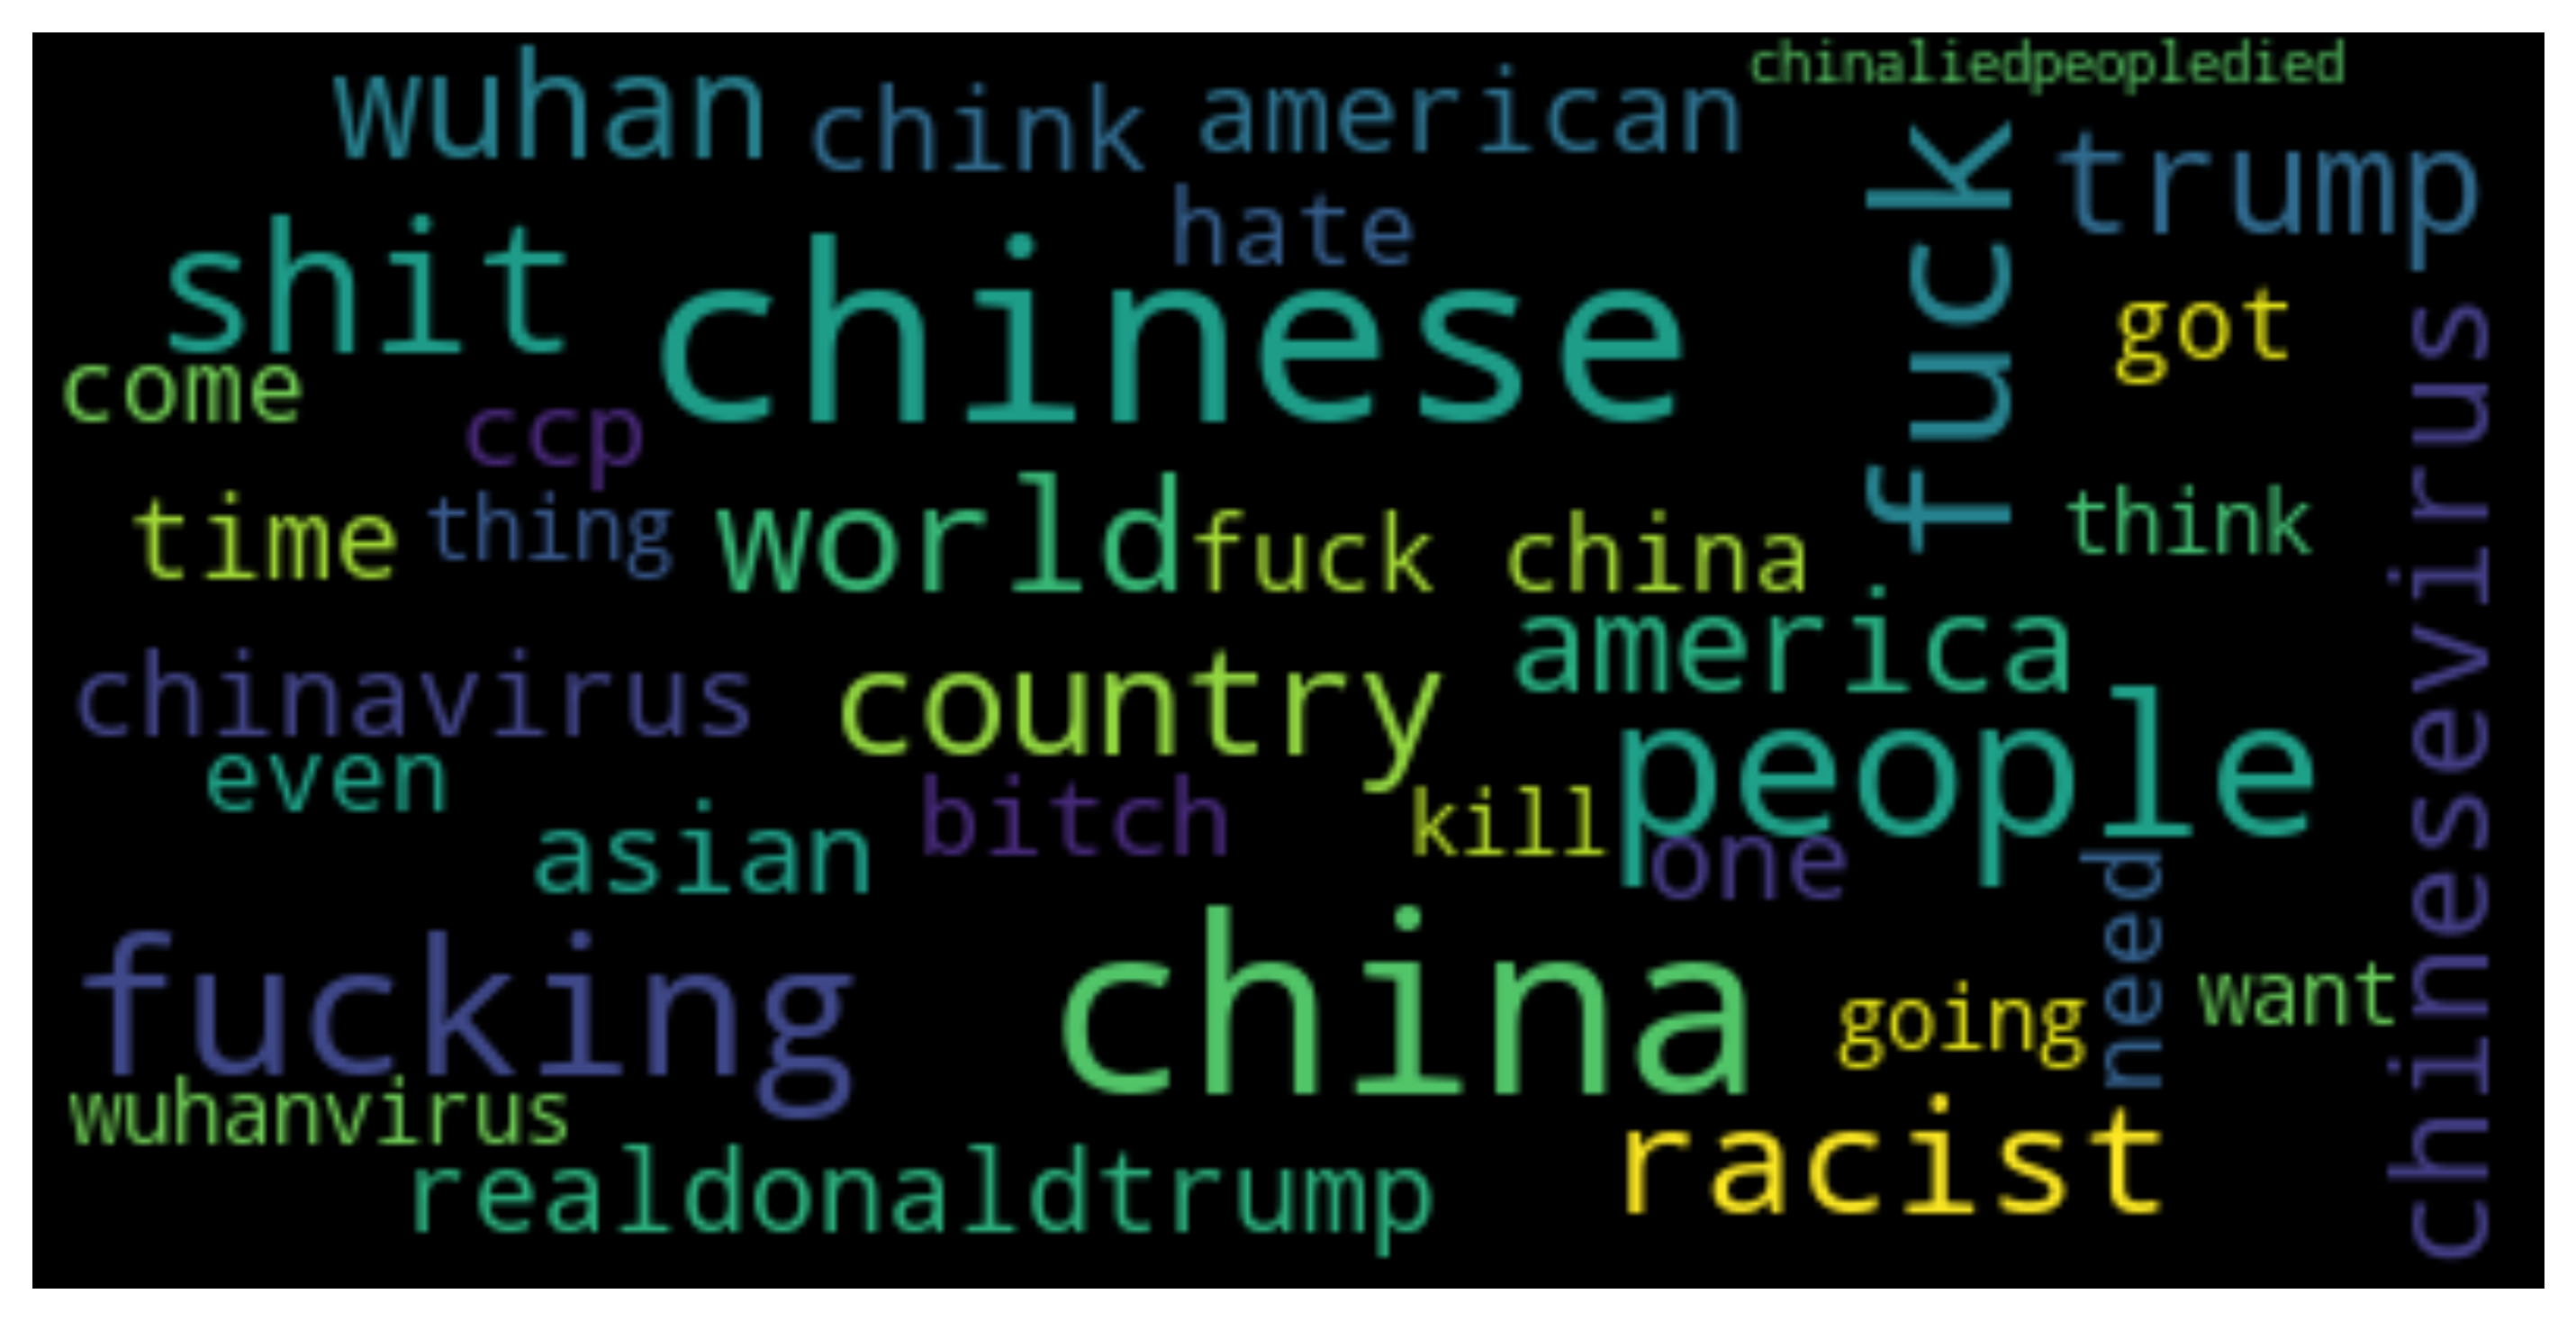

In [59]:
#Wordcloud for unigrams Hatred
tweets_wordcloud_unigram_n = WordCloud(background_color="black", max_font_size = 40 ,
                              max_words=35
                             ).generate(tweet_string_n)

# view the wordcloud
plt.figure(figsize=[10,10])
plt.imshow(tweets_wordcloud_unigram_n, interpolation='bilinear')
plt.axis('off')
plt.show()

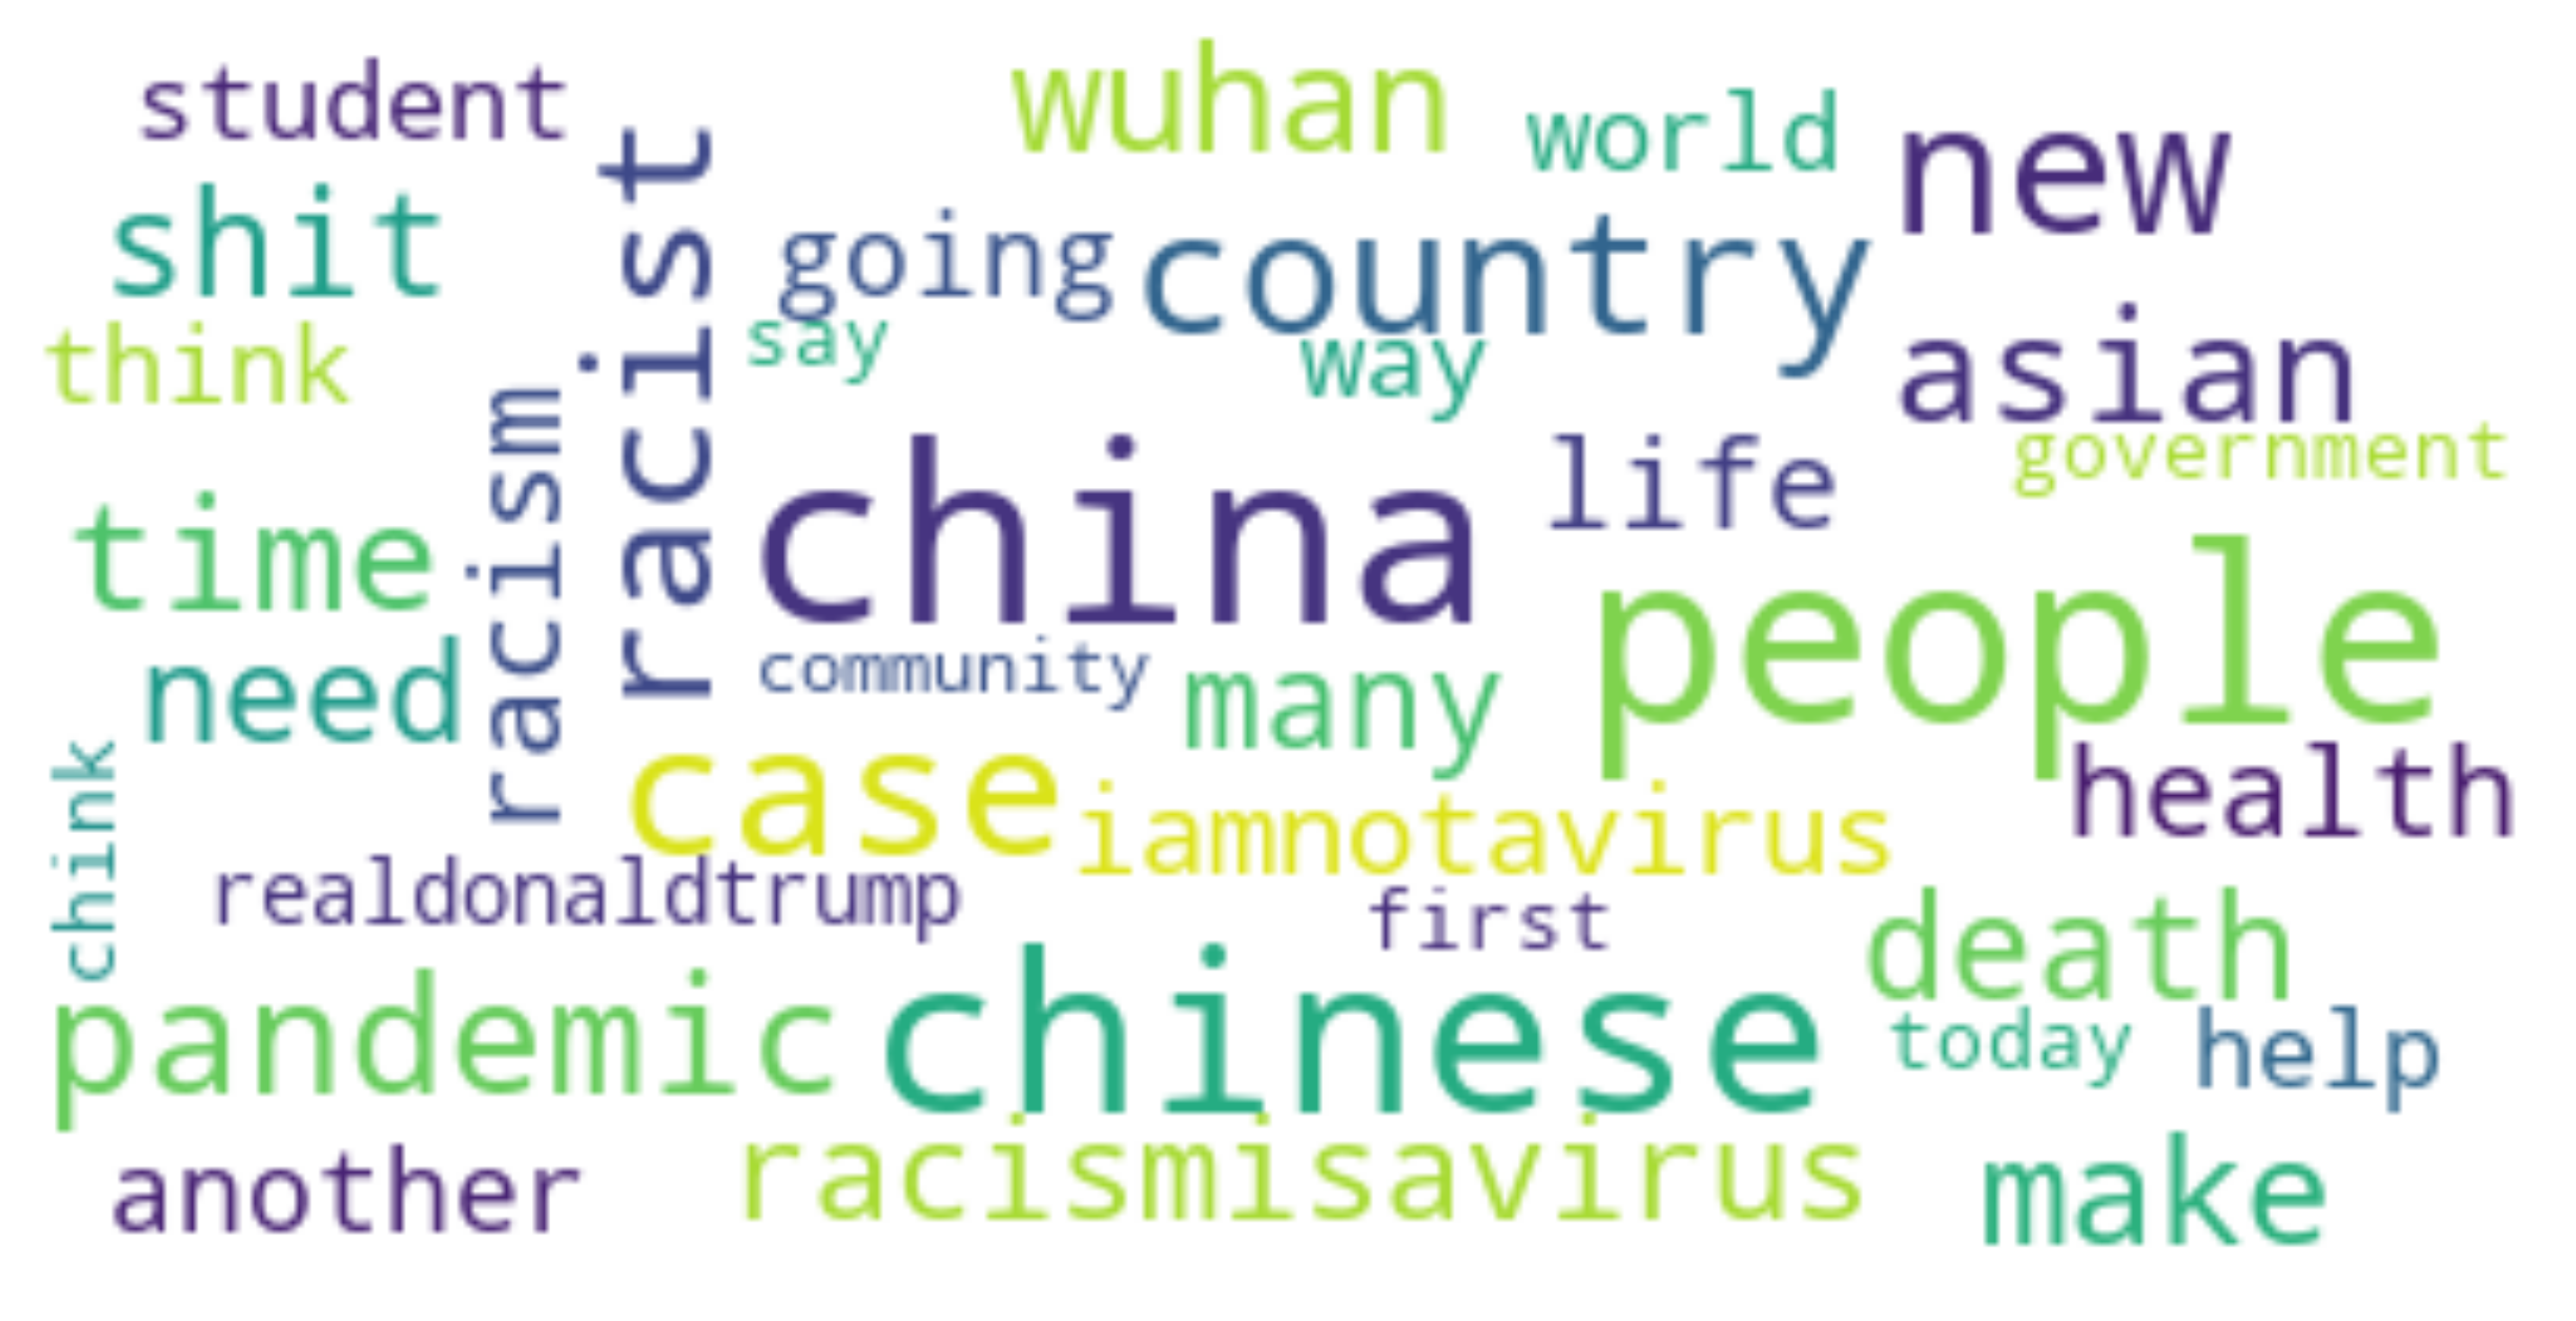

In [60]:
#Wordcloud for unigrams Non Hatred
tweets_wordcloud_unigram_p = WordCloud(background_color="white",max_font_size = 40, 
                              max_words=35
                             ).generate(tweet_string_p)

# view the wordcloud
plt.figure(figsize=[10,10])
plt.imshow(tweets_wordcloud_unigram_p, interpolation='bilinear')
plt.axis('off')
plt.show()

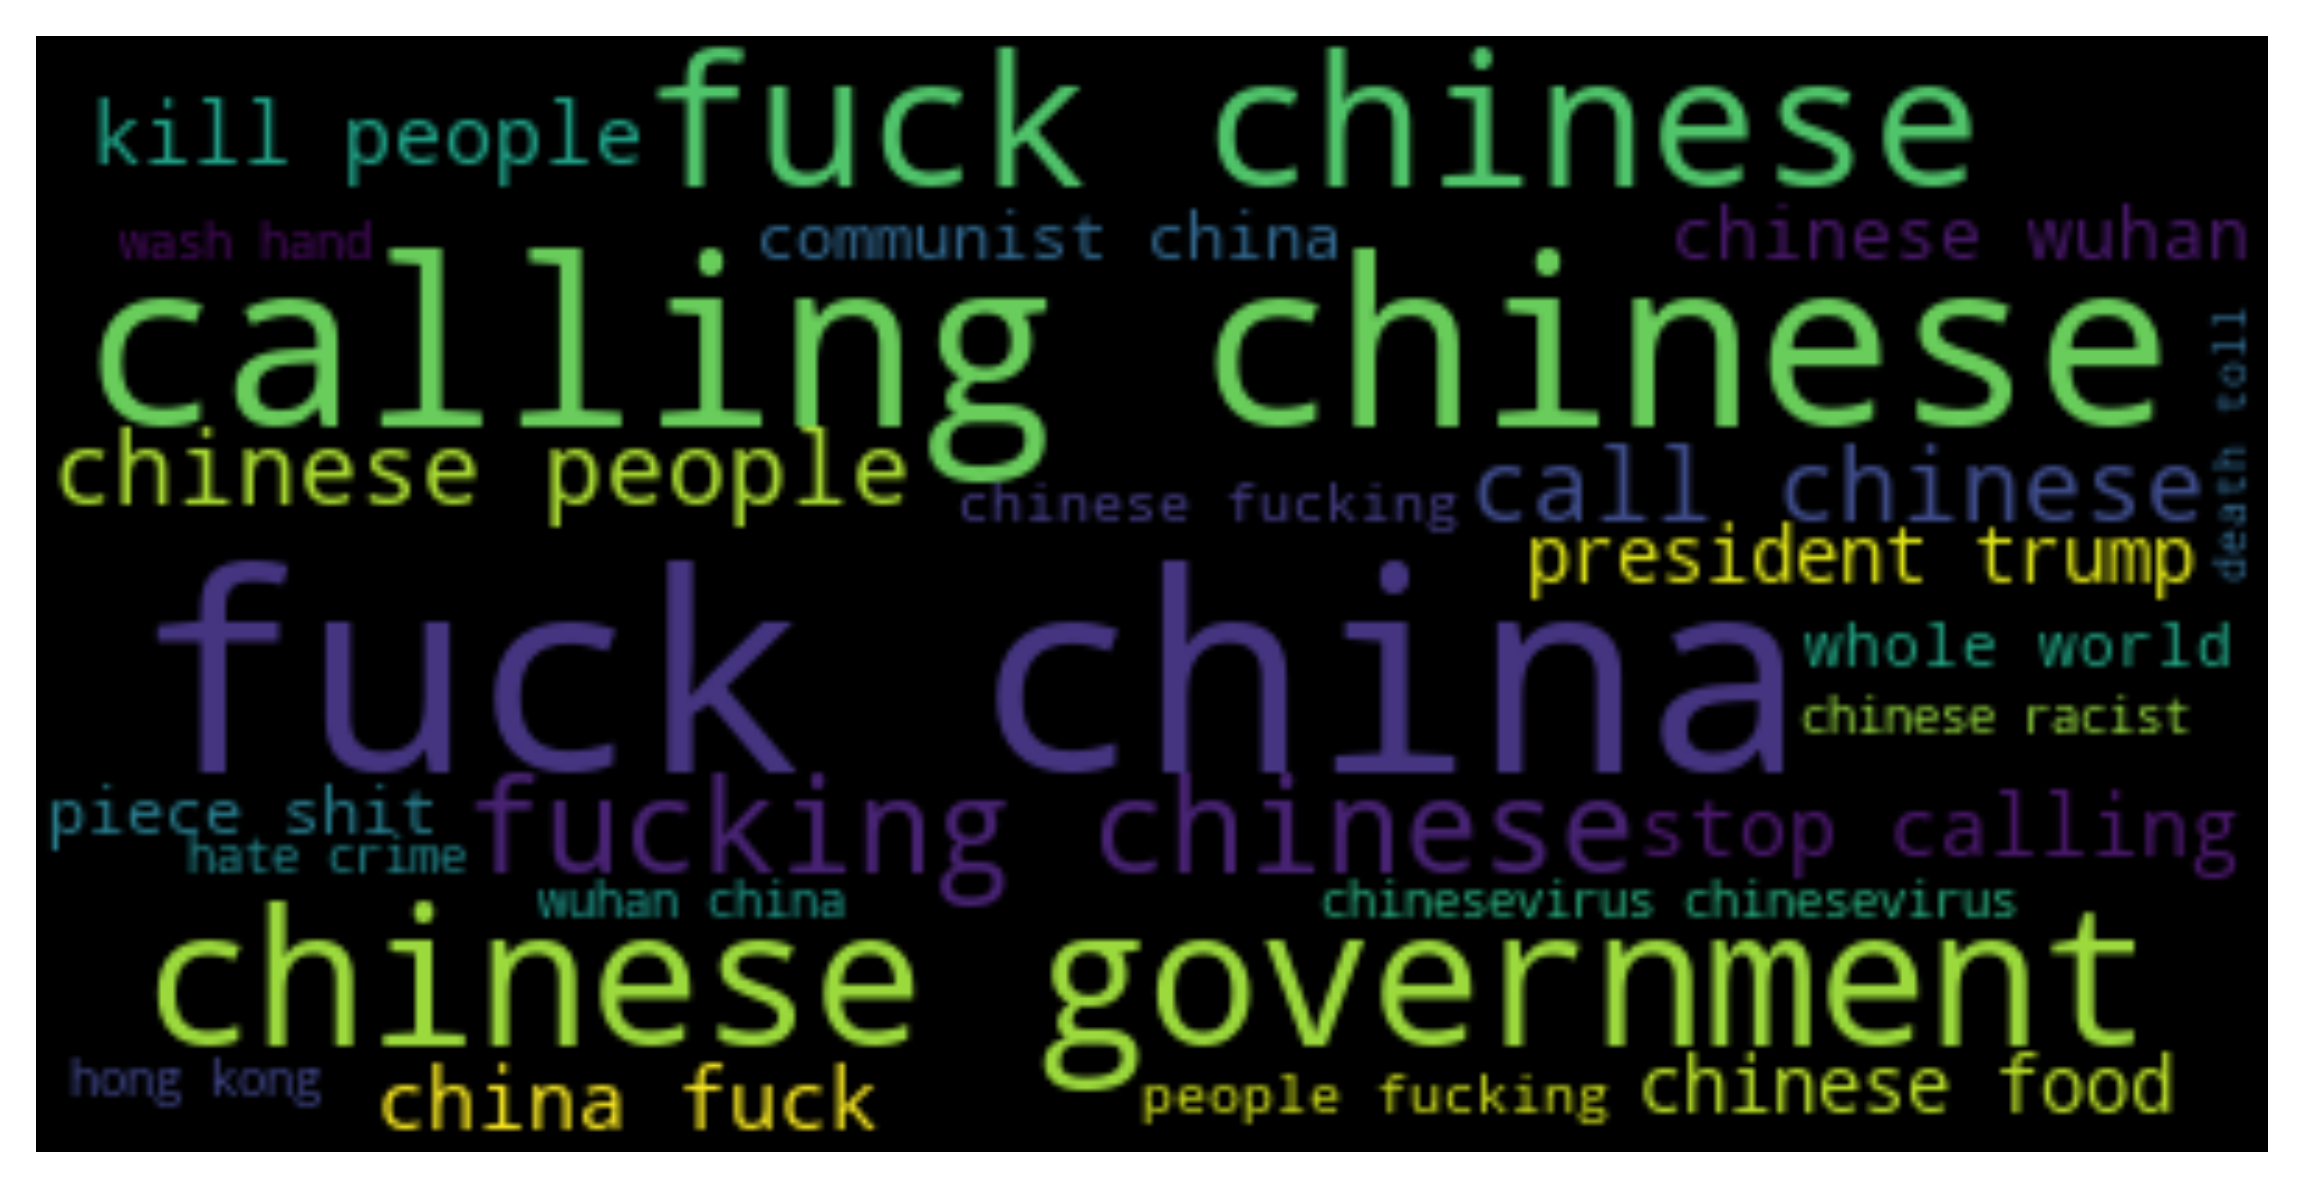

In [61]:
#Wordcloud for bigrams Hatred
tweets_wordcloud_bigram_n = WordCloud(background_color="black", max_font_size = 50,
                              max_words=25,
                             collocation_threshold = 3
                             ).generate(tweet_string_n)

# view the wordcloud
plt.figure(figsize=[8,8])
plt.imshow(tweets_wordcloud_bigram_n, interpolation='bilinear')
plt.axis('off')
plt.show()

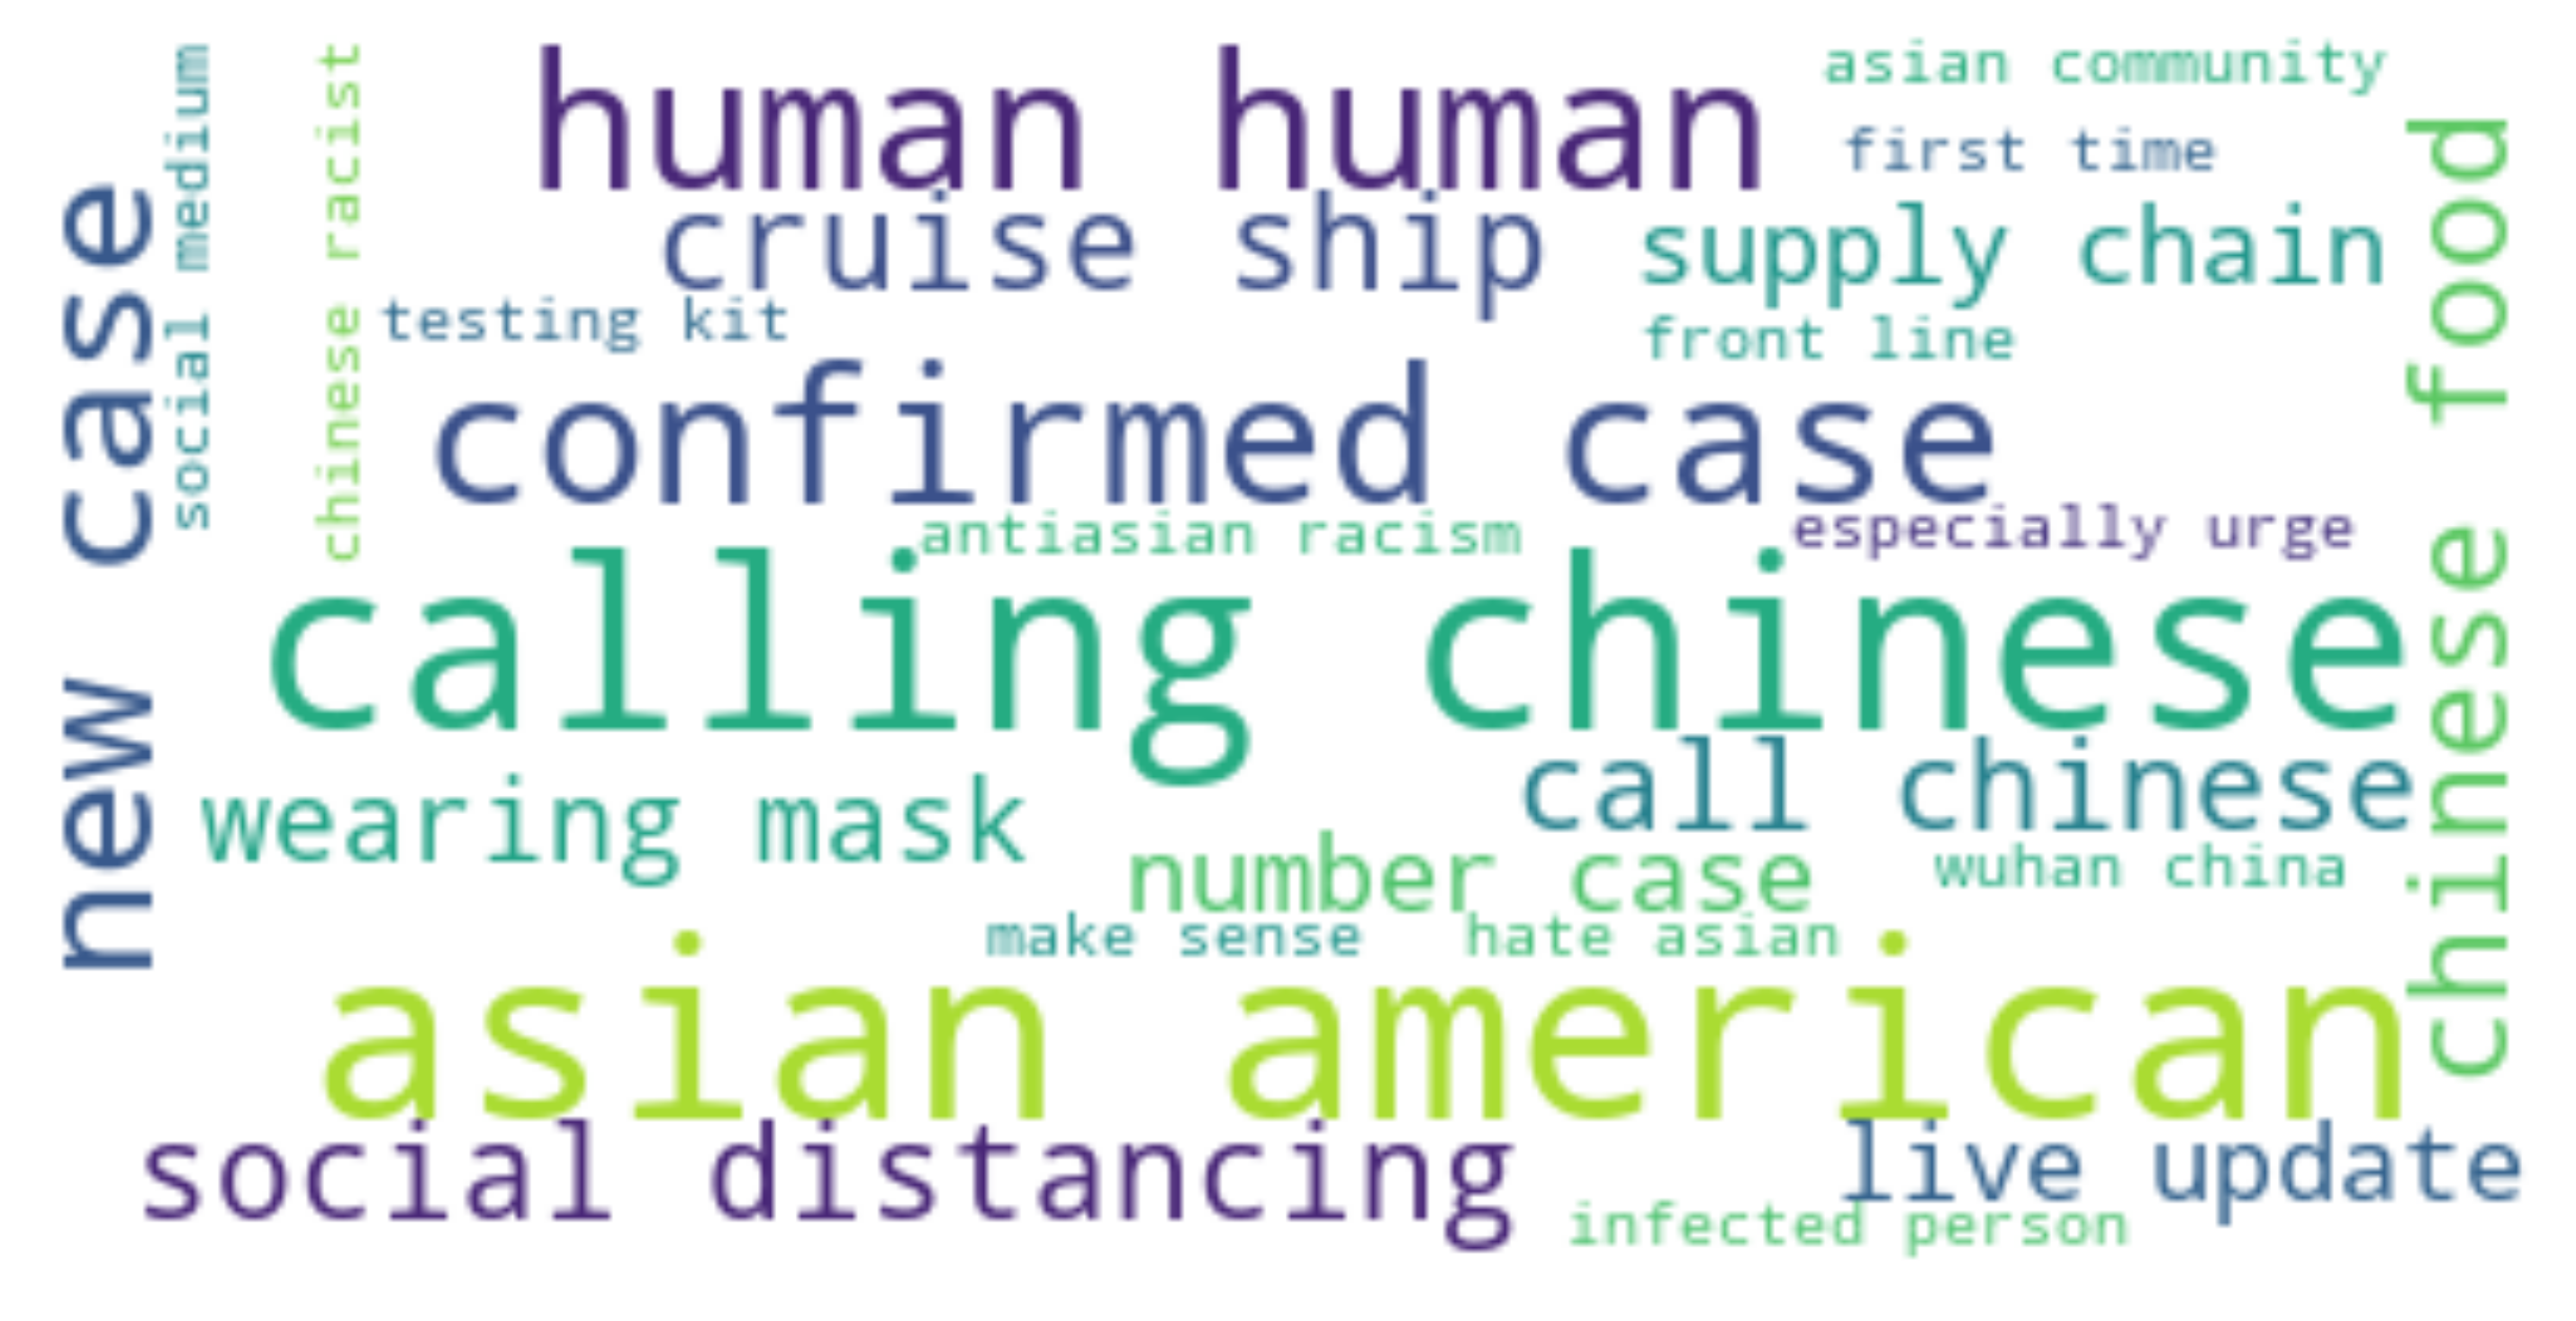

In [62]:
#Wordcloud for bigrams Non Hatred
tweets_wordcloud_bigram_p = WordCloud(background_color="white", max_font_size = 40,
                              max_words=25,
                             collocation_threshold = 3
                             ).generate(tweet_string_p)

# view the wordcloud


plt.figure(figsize=[10,10])
plt.imshow(tweets_wordcloud_bigram_p, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
#n-gram analysis

def unigram(text):
    unigrams_series = (pd.Series(nltk.ngrams(text,1)).value_counts())[:10]
    return unigrams_series.sort_values()

def bigram(text):
    bigrams_series = (pd.Series(nltk.ngrams(text,2)).value_counts())[:10]
    return bigrams_series.sort_values()

def trigram(text):
    trigrams_series = (pd.Series(nltk.ngrams(text,3)).value_counts())[:10]
    return trigrams_series.sort_values()

In [64]:
# Hatred Tweets Unigram analysis
unigram(tweet_doc_n)

(mean,)       1
(could,)      1
(going,)      1
(fauci,)      1
(far,)        1
(much,)       1
(power,)      1
(person,)     1
(elected,)    1
(people,)     1
dtype: int64

In [65]:
# Non Hatred Tweets Unigram analysis
unigram(tweet_doc_p)

(sorry,)                  1
(family,)                 1
(coronavirususa,)         1
(wuhanvirus,)             1
(coronavirusoutbreak,)    1
(roll,)                   1
(roll,)                   1
(per,)                    1
(sheet,)                  1
(143,)                    1
dtype: int64

In [66]:
# Hatred Tweets Bigram analysis
bigram(tweet_doc_n)

(mean, kinda)        1
(could, give)        1
(going, fauci)       1
(fauci, far)         1
(far, much)          1
(much, power)        1
(power, person)      1
(person, elected)    1
(elected, people)    1
(people, could)      1
dtype: int64

In [67]:
# Non Hatred Tweets Bigram analysis
bigram(tweet_doc_p)

(sorry, hear)                        1
(white, family)                      1
(wuhanvirus, coronavirususa)         1
(coronavirusoutbreak, wuhanvirus)    1
(roll, coronavirusoutbreak)          1
(roll, roll)                         1
(per, roll)                          1
(sheet, per)                         1
(143, sheet)                         1
(roll, 143)                          1
dtype: int64

In [68]:
# Hatred Tweets Trigram analysis
trigram(tweet_doc_n)

(mean, kinda, knew)              1
(people, could, give)            1
(tuckercarlson, going, fauci)    1
(going, fauci, far)              1
(fauci, far, much)               1
(far, much, power)               1
(much, power, person)            1
(power, person, elected)         1
(person, elected, people)        1
(elected, people, could)         1
dtype: int64

In [69]:
# Non Hatred Tweets Trigram analysis
trigram(tweet_doc_p)

(sorry, hear, indiafightscorona)                     1
(towel, white, family)                               1
(coronavirusoutbreak, wuhanvirus, coronavirususa)    1
(roll, coronavirusoutbreak, wuhanvirus)              1
(roll, roll, coronavirusoutbreak)                    1
(per, roll, roll)                                    1
(sheet, per, roll)                                   1
(143, sheet, per)                                    1
(roll, 143, sheet)                                   1
(family, roll, 143)                                  1
dtype: int64

In [70]:
#word frquency
def word_freq(text):
    news_word_frequency = Counter(text)
    return news_word_frequency

In [71]:
# Tweets word frequency
freq_tw = pd.DataFrame.from_dict(word_freq(tweet_words), orient='index').reset_index()
freq_tw.columns=["word", "freq"]
freq_tw.sort_values(by="freq", ascending=False).head(10)

word  freq
970   chinese   345
891     china   315
180    people   208
6        fuck   163
1182     shit   145
2435  fucking   124
732    racist   109
289     world    99
192   country    97
310     wuhan    86

In [72]:
# Hatred tweets word frequency
freq_tw_n = pd.DataFrame.from_dict(word_freq(tweet_words_n), orient='index').reset_index()
freq_tw_n.columns=["word", "freq"]
freq_tw_n.sort_values(by="freq", ascending=False).head(10)

word  freq
779  chinese   289
371    china   256
6       fuck   159
54    people   151
471     shit   125
997  fucking   119
655    world    85
294   racist    80
245    trump    72
241  country    70

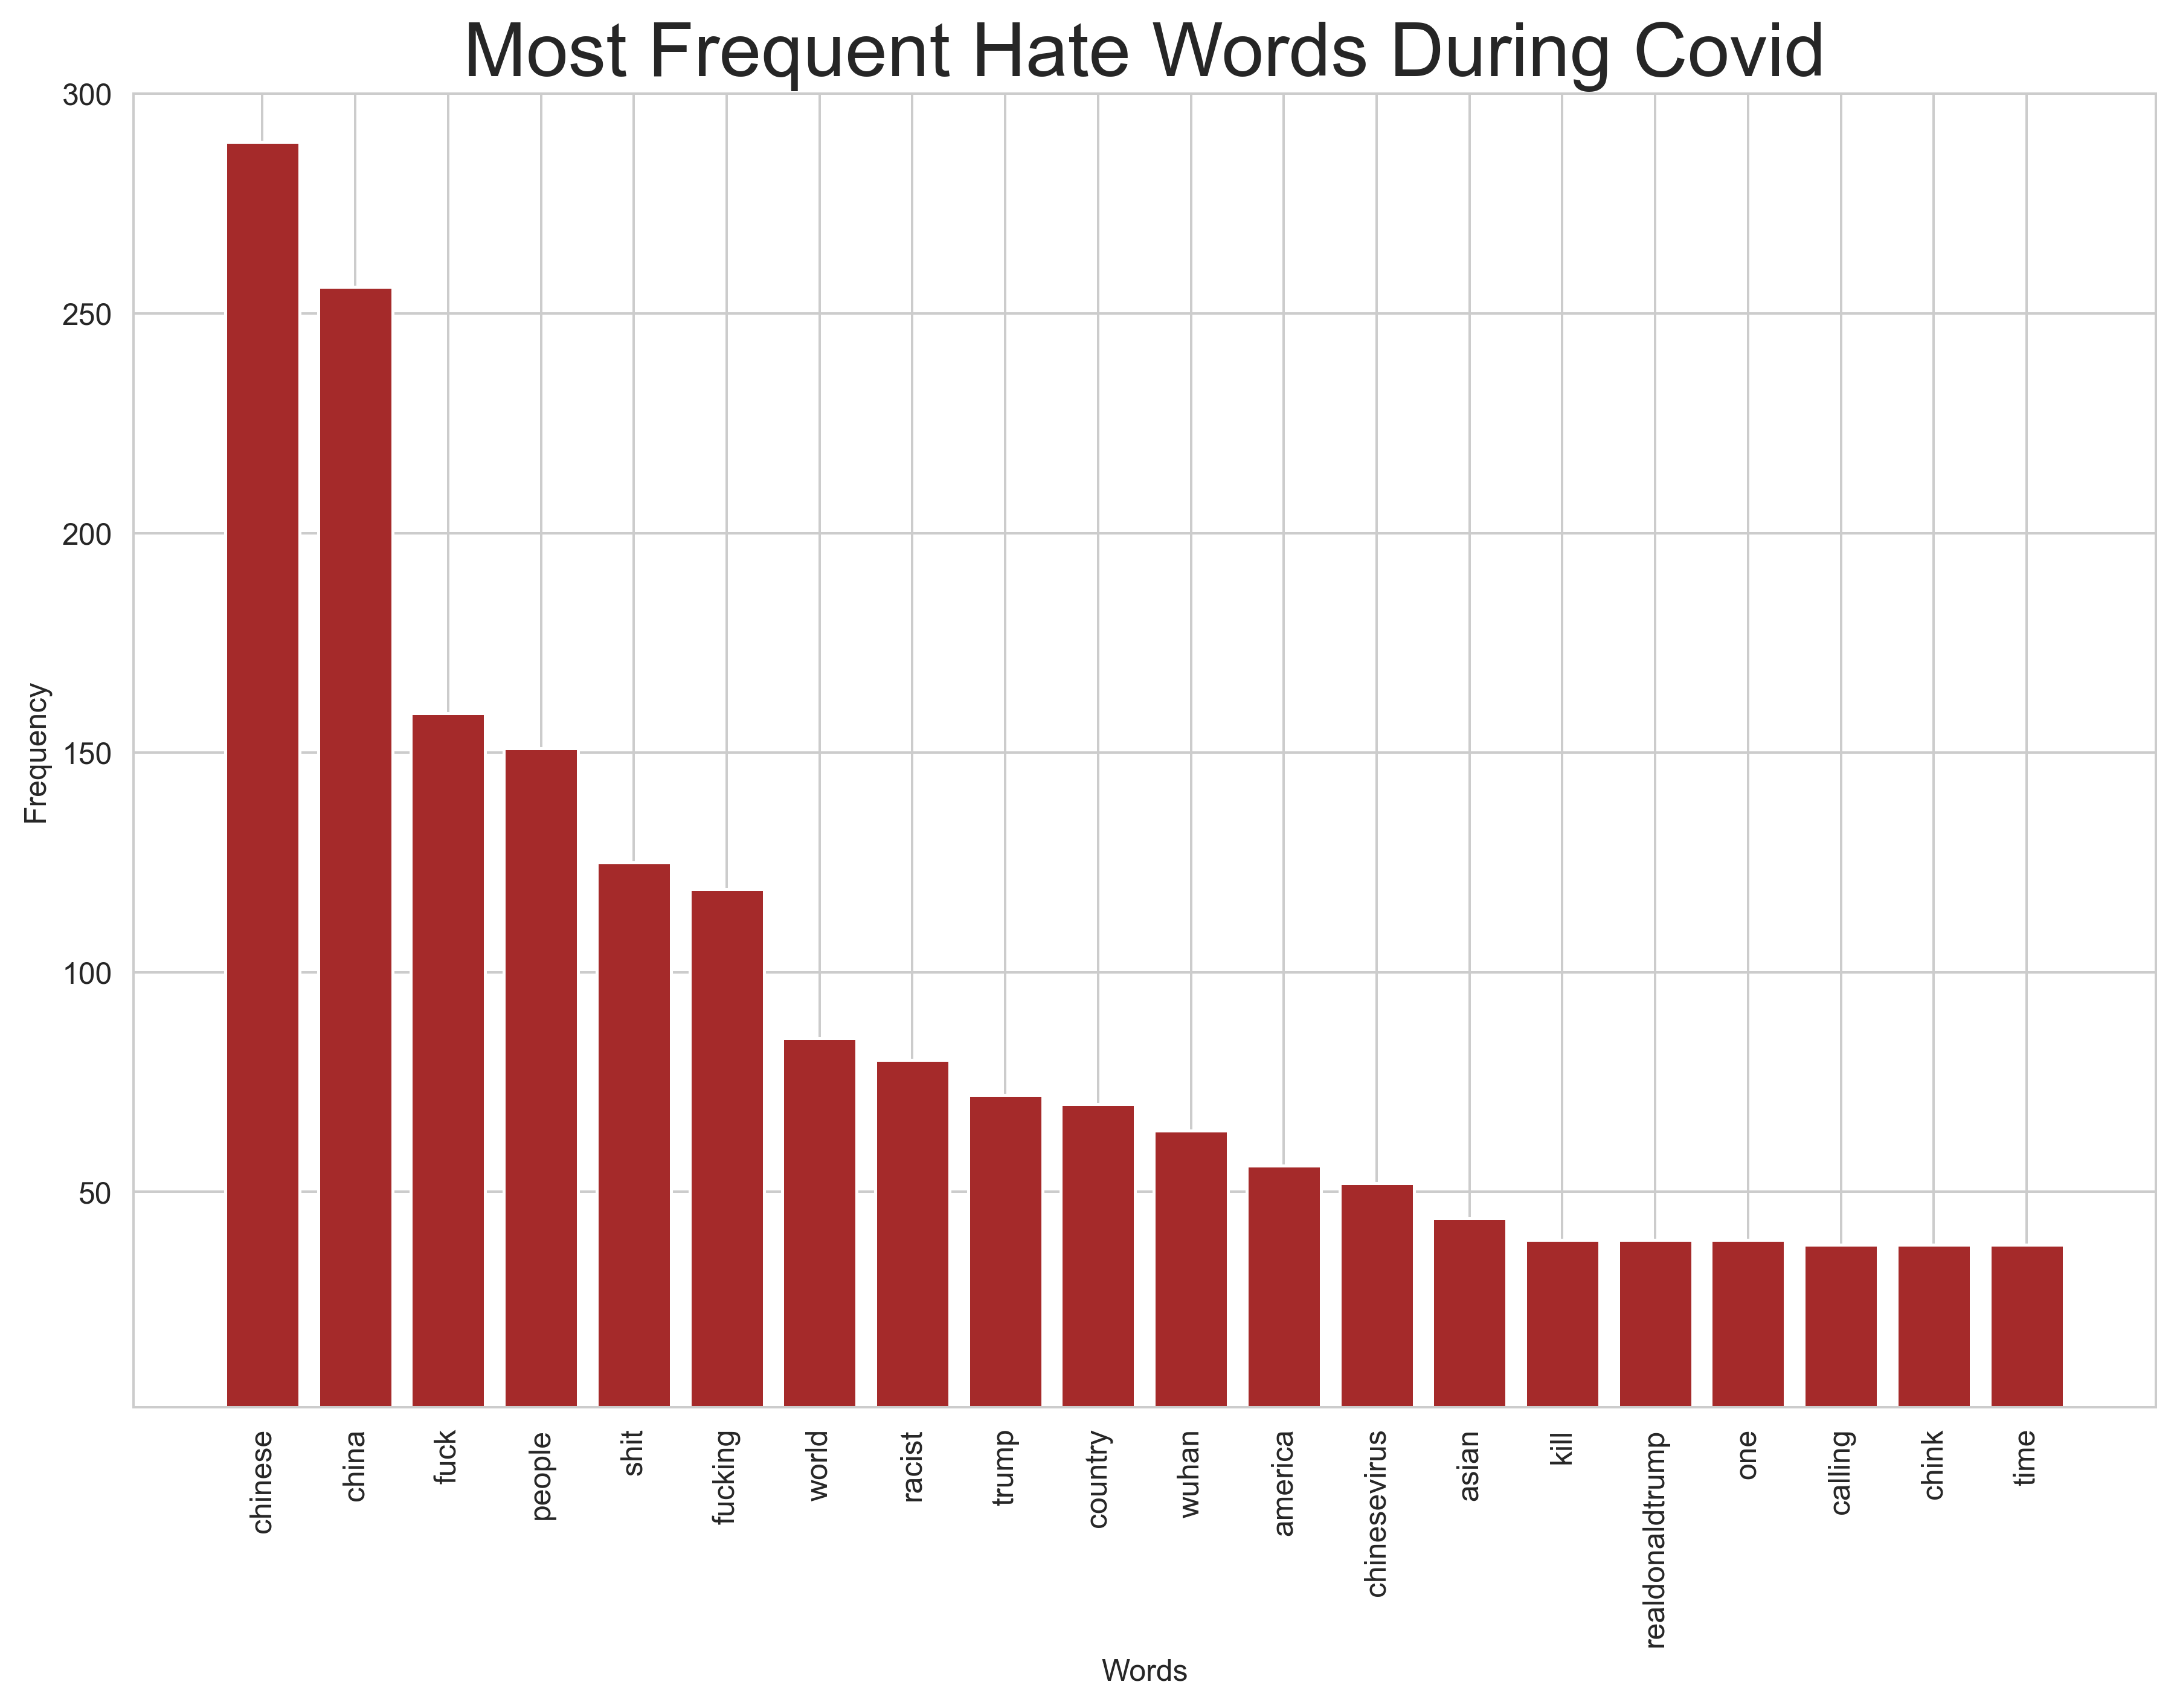

In [73]:
# Plotting most common hate words

fig, ax = plt.subplots(figsize=(12,8))
plt.ylim(1, 300)
plt.xticks(rotation=90)
plt.bar(freq_tw_n.sort_values(by="freq", ascending=False)["word"].head(20),
        freq_tw_n.sort_values(by="freq", ascending=False)["freq"].head(20), color = 'brown')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.title('Most Frequent Hate Words During Covid',fontsize = 25)

plt.show()

In [74]:
# Non Hatred tweets word frequency
freq_tw_p = pd.DataFrame.from_dict(word_freq(tweet_words_p), orient='index').reset_index()
freq_tw_p.columns=["word", "freq"]
freq_tw_p.sort_values(by="freq", ascending=False).head(10)

word  freq
1234     china    59
252     people    57
631    chinese    56
111       case    37
1774     asian    33
1770    racist    29
132    country    27
494   american    26
35    pandemic    25
521       time    24

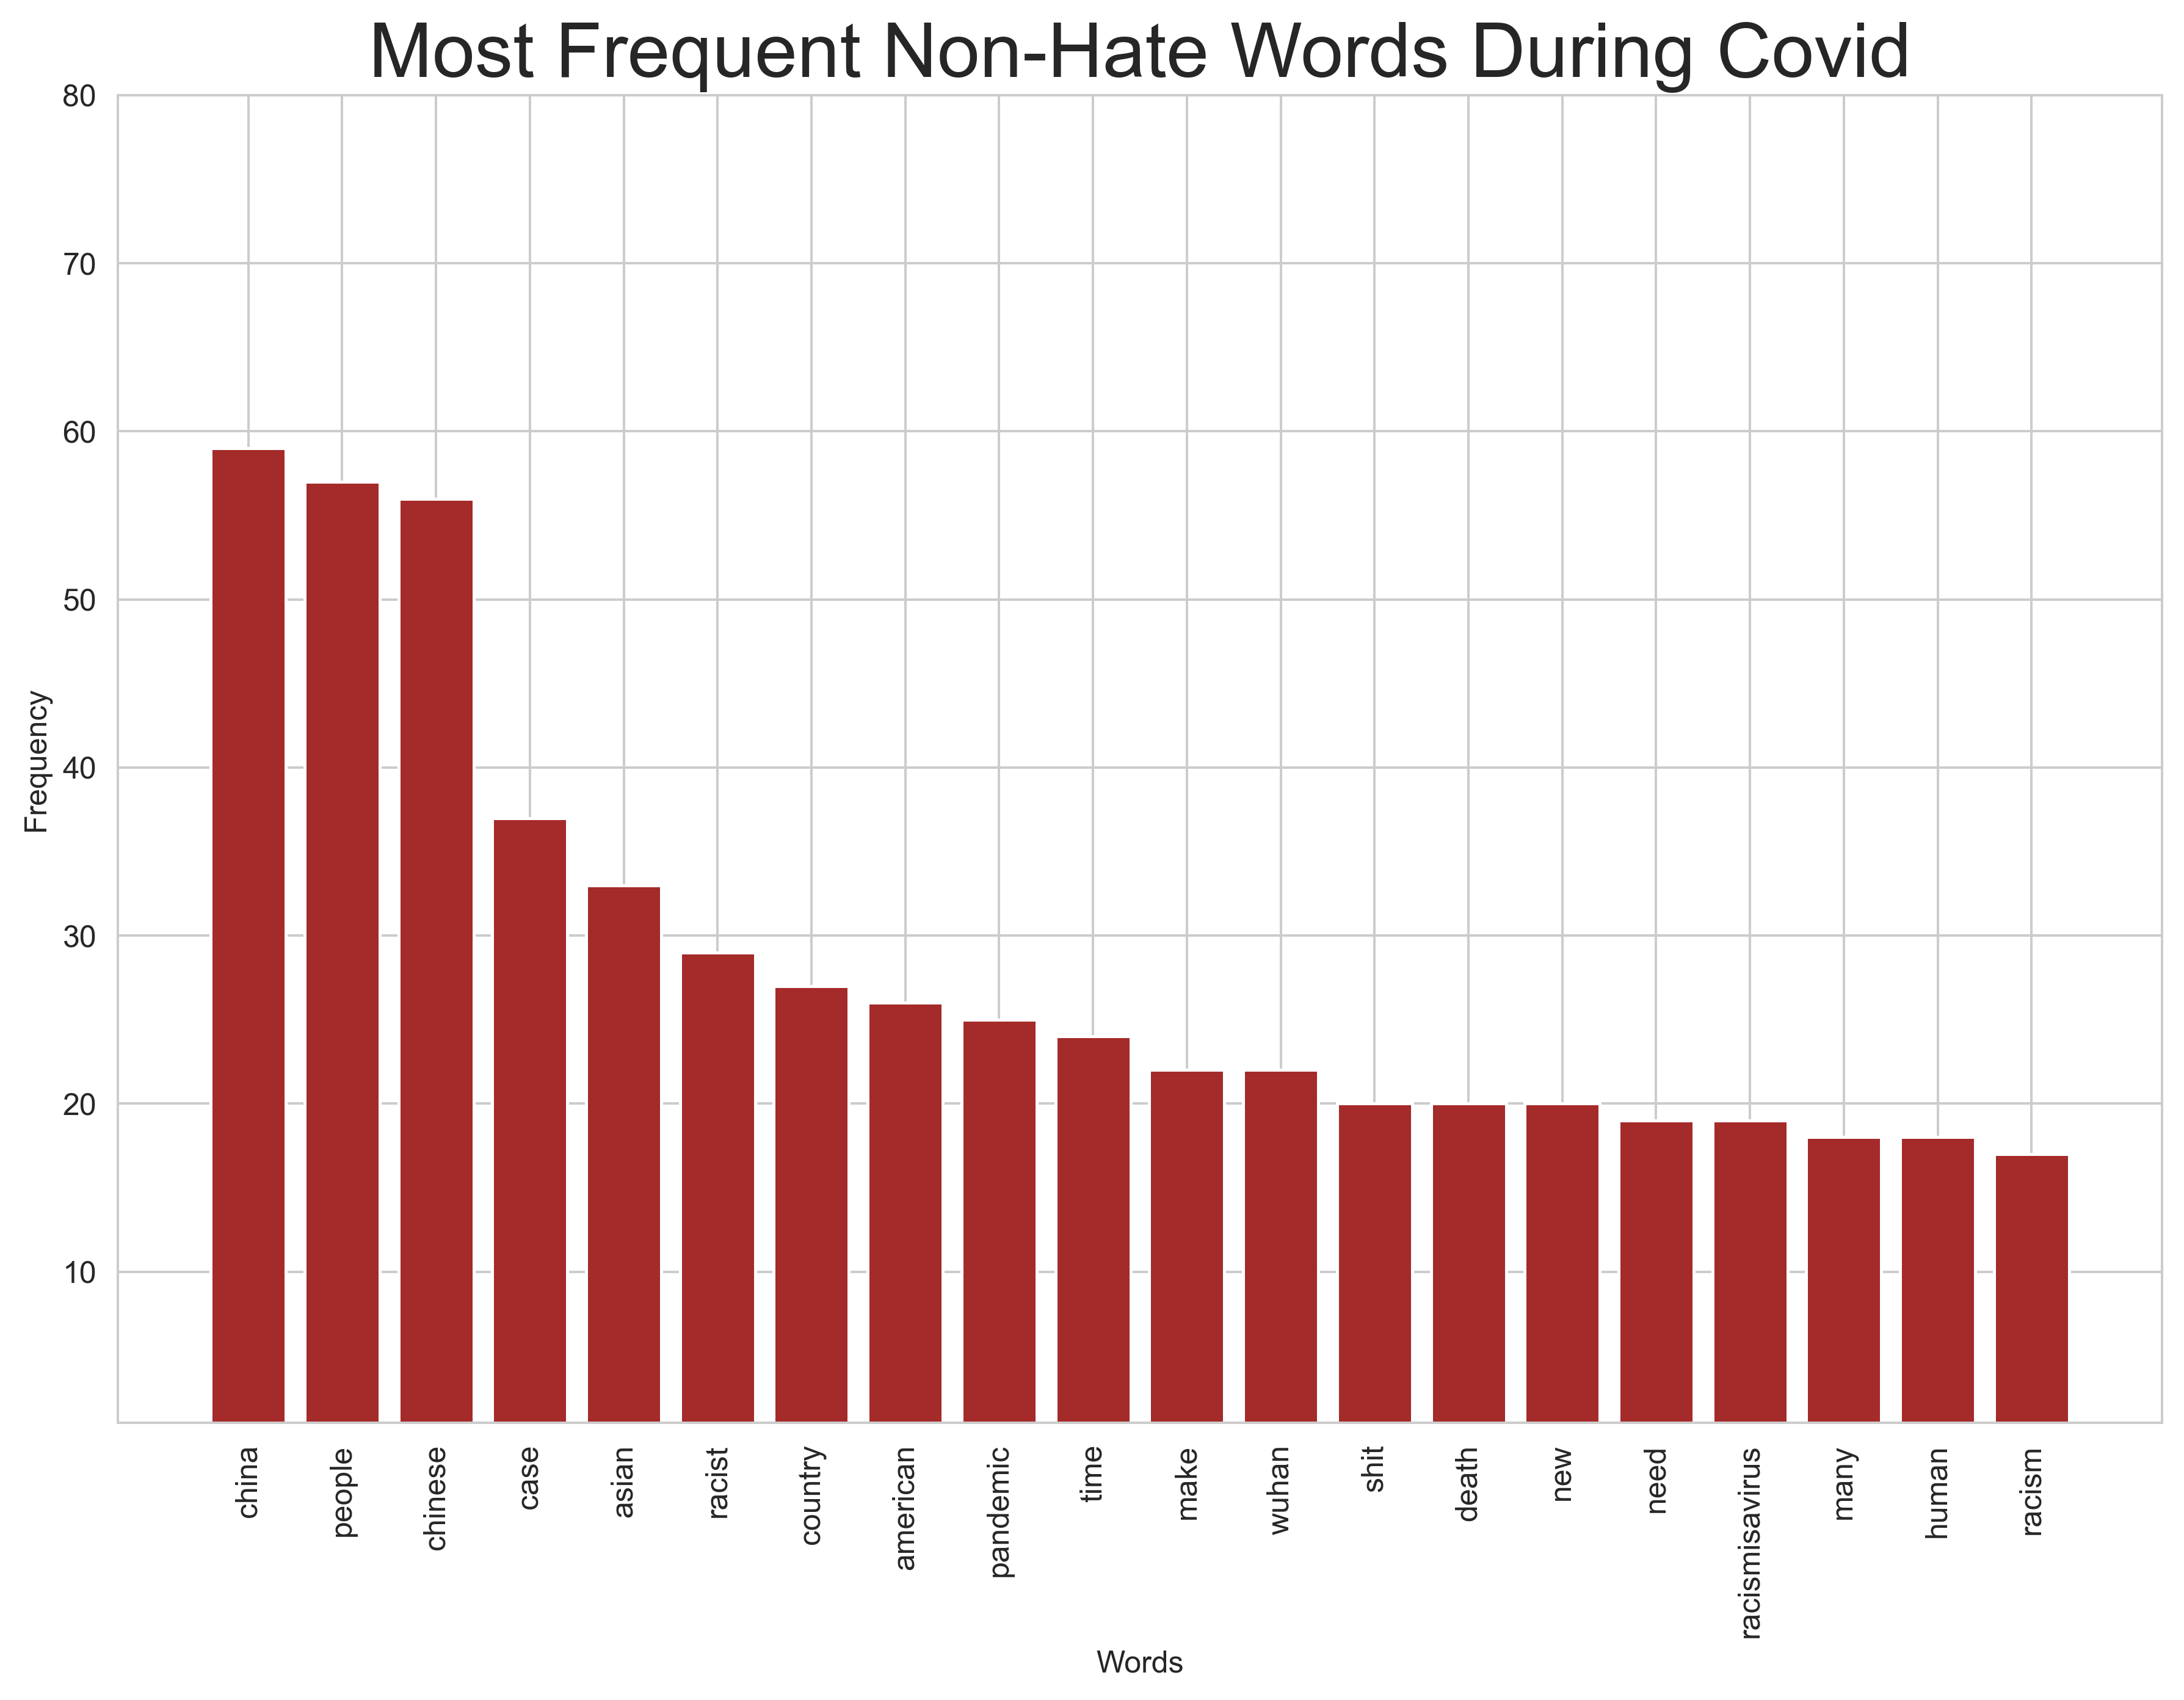

In [75]:
# Plotting most common non-hate words

fig, ax = plt.subplots(figsize=(12,8))
plt.ylim(1, 80)
plt.xticks(rotation=90)
plt.bar(freq_tw_p.sort_values(by="freq", ascending=False)["word"].head(20),
        freq_tw_p.sort_values(by="freq", ascending=False)["freq"].head(20), color = 'brown')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.title('Most Frequent Non-Hate Words During Covid',fontsize = 25)
plt.show()

In [76]:
tw.to_csv('Pre-Processed Dataset_During Covid.csv')

In [77]:
#pip install -U gensim

In [78]:
#!pip install pyLDAvis


In [79]:
import gensim
from gensim import corpora

In [80]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
# Creating vocabulary dictionary and document term matrix

dictionary = corpora.Dictionary(trying)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in trying]
dictionary

In [82]:

dictionary_n = corpora.Dictionary(trying_n)
doc_term_matrix_n = [dictionary_n.doc2bow(text) for text in trying_n]


In [83]:
dictionary_p = corpora.Dictionary(trying_p)
doc_term_matrix_p = [dictionary_p.doc2bow(texts) for texts in trying_p]

In [84]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100, alpha='symmetric',
                chunksize=1000, passes=50,iterations=1000)

In [85]:
#LDA model for Hatred tweets
lda_model_n = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix_n, id2word=dictionary_n, num_topics=2, random_state=100, alpha='symmetric',
                chunksize=10, passes=10,iterations=100,per_word_topics=True)

In [86]:
lda_model_n1 = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix_n, id2word=dictionary_n, num_topics=9, random_state=100, alpha='symmetric',
                chunksize=10, passes=10,iterations=100,per_word_topics=True)

In [87]:
#LDA model for non-hatred tweets
lda_model_p = LDA(corpus=doc_term_matrix_p, id2word=dictionary_p, num_topics=5, random_state=100, alpha='symmetric',
                chunksize=10, passes=10,iterations=100,per_word_topics=True)

In [88]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [89]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=trying, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.87864951295052

Coherence Score:  0.3428827537755176


In [90]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=trying, start=2, limit=10, step=1)


In [92]:
model_list_n, coherence_values_n = compute_coherence_values(dictionary=dictionary_n, corpus=doc_term_matrix_n, texts=trying_n, start=2, limit=10, step=1)


In [93]:
model_list_p, coherence_values_p = compute_coherence_values(dictionary=dictionary_p, corpus=doc_term_matrix_p, texts=trying_p, start=2, limit=10, step=1)


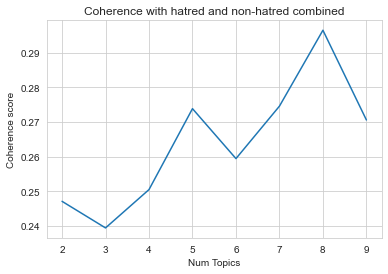

In [91]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.title("Coherence with hatred and non-hatred combined")
plt.show()# Print the coherence scores

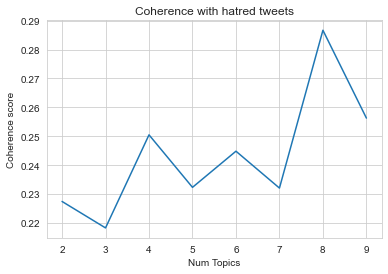

In [94]:
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_n)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.title("Coherence with hatred tweets")
plt.show()# Print the coherence scores

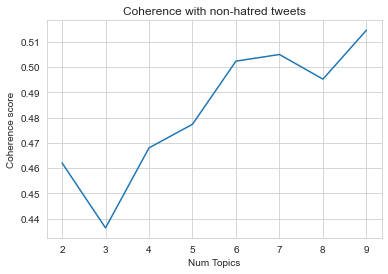

In [95]:
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_p)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
plt.title("Coherence with non-hatred tweets")
plt.show()# Print the coherence scores

In [96]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2472
Num Topics = 3  has Coherence Value of 0.2395
Num Topics = 4  has Coherence Value of 0.2505
Num Topics = 5  has Coherence Value of 0.2739
Num Topics = 6  has Coherence Value of 0.2595
Num Topics = 7  has Coherence Value of 0.2746
Num Topics = 8  has Coherence Value of 0.2965
Num Topics = 9  has Coherence Value of 0.2706


In [97]:
# Print the coherence scores for Hatred
for m, cv in zip(x, coherence_values_n):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2275
Num Topics = 3  has Coherence Value of 0.2183
Num Topics = 4  has Coherence Value of 0.2505
Num Topics = 5  has Coherence Value of 0.2324
Num Topics = 6  has Coherence Value of 0.2449
Num Topics = 7  has Coherence Value of 0.2321
Num Topics = 8  has Coherence Value of 0.2867
Num Topics = 9  has Coherence Value of 0.2563


In [98]:
# Print the coherence scores for Non-Hatred
for m, cv in zip(x, coherence_values_p):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4621
Num Topics = 3  has Coherence Value of 0.4363
Num Topics = 4  has Coherence Value of 0.468
Num Topics = 5  has Coherence Value of 0.4774
Num Topics = 6  has Coherence Value of 0.5023
Num Topics = 7  has Coherence Value of 0.505
Num Topics = 8  has Coherence Value of 0.4952
Num Topics = 9  has Coherence Value of 0.5146


In [99]:
lda_model.print_topics()

[(0,
  '0.037*"china" + 0.027*"chinese" + 0.024*"fuck" + 0.014*"world" + 0.010*"people" + 0.007*"realdonaldtrump" + 0.007*"trump" + 0.007*"chinesevirus" + 0.006*"ccp" + 0.006*"country"'),
 (1,
  '0.018*"china" + 0.016*"chinese" + 0.010*"fuck" + 0.009*"racist" + 0.006*"going" + 0.006*"world" + 0.006*"fucked" + 0.005*"chinesevirus" + 0.005*"even" + 0.005*"one"'),
 (2,
  '0.019*"chinese" + 0.008*"country" + 0.008*"wuhan" + 0.008*"need" + 0.008*"racist" + 0.008*"food" + 0.007*"shit" + 0.007*"china" + 0.007*"hate" + 0.006*"people"'),
 (3,
  '0.020*"people" + 0.010*"asian" + 0.010*"america" + 0.009*"white" + 0.008*"kill" + 0.008*"chinese" + 0.006*"aoc" + 0.005*"american" + 0.005*"without" + 0.005*"racist"'),
 (4,
  '0.024*"chinese" + 0.018*"shit" + 0.017*"fucking" + 0.015*"people" + 0.010*"china" + 0.008*"world" + 0.006*"president" + 0.006*"fuck" + 0.006*"trump" + 0.006*"chink"'),
 (5,
  '0.016*"shit" + 0.015*"fucking" + 0.013*"china" + 0.010*"chinese" + 0.009*"racist" + 0.008*"wuhan" + 0.00

In [100]:
lda_model_n.print_topics()

[(0,
  '0.046*"fucking" + 0.033*"china" + 0.025*"chinese" + 0.018*"lie" + 0.018*"shit" + 0.012*"fuck" + 0.011*"really" + 0.011*"calling" + 0.011*"realdonaldtrump" + 0.010*"racist"'),
 (1,
  '0.023*"bitch" + 0.019*"hope" + 0.018*"people" + 0.014*"hoax" + 0.010*"asian" + 0.009*"son" + 0.005*"impotusthe3rd" + 0.005*"ghad" + 0.005*"cost" + 0.005*"sincerely"')]

In [101]:
lda_model_p.print_topics()

[(0,
  '0.045*"china" + 0.027*"shit" + 0.024*"people" + 0.020*"many" + 0.017*"right" + 0.016*"chinavirus" + 0.014*"rise" + 0.013*"holy" + 0.013*"need" + 0.013*"wuhan"'),
 (1,
  '0.027*"health" + 0.023*"american" + 0.022*"asian" + 0.022*"attack" + 0.016*"make" + 0.014*"racism" + 0.014*"iamnotavirus" + 0.012*"racismisavirus" + 0.011*"time" + 0.010*"life"'),
 (2,
  '0.074*"chinese" + 0.034*"racist" + 0.014*"realdonaldtrump" + 0.014*"call" + 0.010*"president" + 0.010*"really" + 0.009*"friend" + 0.008*"wuhanvirus" + 0.007*"fucking" + 0.006*"pandemic"'),
 (3,
  '0.035*"democrat" + 0.024*"world" + 0.022*"trump" + 0.020*"lie" + 0.018*"dear" + 0.016*"organization" + 0.015*"case" + 0.014*"realdonaldtrump" + 0.013*"human" + 0.012*"idiot"'),
 (4,
  '0.028*"illegals" + 0.020*"communist" + 0.019*"severity" + 0.019*"give" + 0.018*"bill" + 0.017*"warning" + 0.017*"system" + 0.014*"fall" + 0.012*"f" + 0.012*"healthcare"')]

In [102]:
#Dominant topics in case of hatred tweets


def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix_n, texts=trying_n):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_n, corpus=doc_term_matrix_n, texts=trying_n)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.9163   
1            1             1.0              0.8844   
2            2             1.0              0.8828   
3            3             1.0              0.6858   
4            4             1.0              0.6513   

                                            Keywords  \
0  fucking, china, chinese, lie, shit, fuck, real...   
1  bitch, hope, people, hoax, asian, son, impotus...   
2  bitch, hope, people, hoax, asian, son, impotus...   
3  bitch, hope, people, hoax, asian, son, impotus...   
4  bitch, hope, people, hoax, asian, son, impotus...   

                                                Text  
0      [mean, kinda, knew, cause, whole, cast, fuck]  
1         [aboard, express, trying, kill, supporter]  
2              [perhaps, serf, purpose, weed, quack]  
3                         [bad, deed, using, excuse]  
4  [nothing, irrelevant, added, anything, bill, o...

In [103]:
#Dominant topics in case of non hatred tweets
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix_p, texts=trying_p):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_p, corpus=doc_term_matrix_p, texts=trying_p)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.7333   
1            1             1.0              0.7065   
2            2             1.0              0.6503   
3            3             1.0              0.6796   
4            4             4.0              0.7168   
5            5             1.0              0.5188   
6            6             0.0              0.4440   
7            7             1.0              0.9588   
8            8             0.0              0.9247   
9            9             4.0              0.9155   

                                            Keywords  \
0  democrat, world, trump, lie, dear, organizatio...   
1  health, american, asian, attack, make, racism,...   
2  health, american, asian, attack, make, racism,...   
3  health, american, asian, attack, make, racism,...   
4  illegals, communist, severity, give, bill, war...   
5  health, american, asian, attack, make, racism,...   
6  china, shit, people, many, right, chinavirus, ...   
7  health, american, asian, attack, make, racism,...   
8  china, shit, people, many, right, chinavirus, ...   
9  illegals, communist, severity, give, bill, war...   

                                                Text  
0                                      [sorry, hear]  
1  [indiafightscorona, emergency, response, healt...  
2  [sba, forgivable, loan, small, business, cashf...  
3  [watch, second, episode, series, fintech, lead...  
4                                  [winning, weeknd]  
5  [desantis, issued, stayathome, order, florida,...  
6                      [already, worried, need, top]  
7  [frontline, worker, train, risky, circumstance...  
8  [think, janta, need, updated, symptom, every, ...  
9  [whats, able, play, re3r, ff7r, thanks, digita...

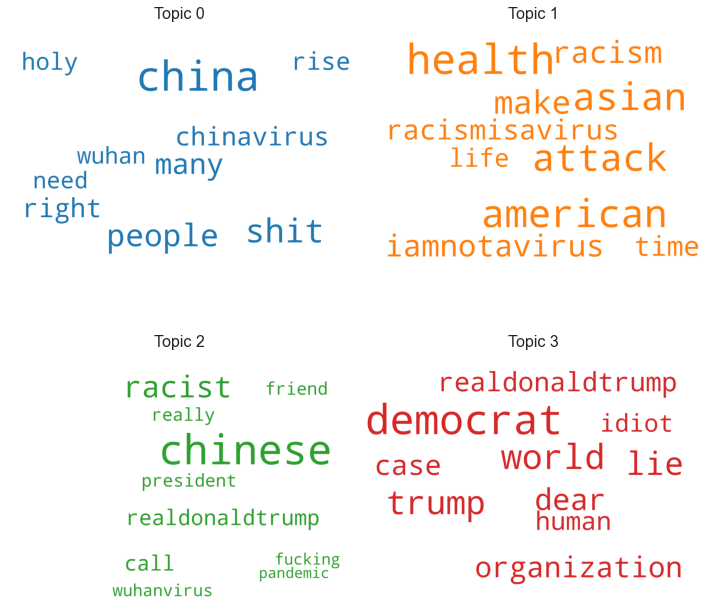

In [104]:
#Word cloud for non-hatred tweets topics


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_p.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

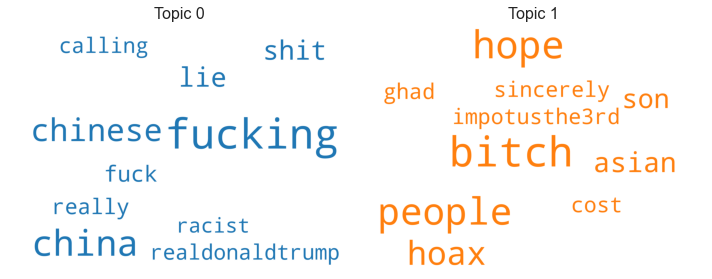

In [111]:
#Word cloud for hatred tweets topics

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(#stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_n.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/var/folders/qs/_0d552px61jf7twzml6pgkq00000gn/T/ipykernel_59330/2954280138.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


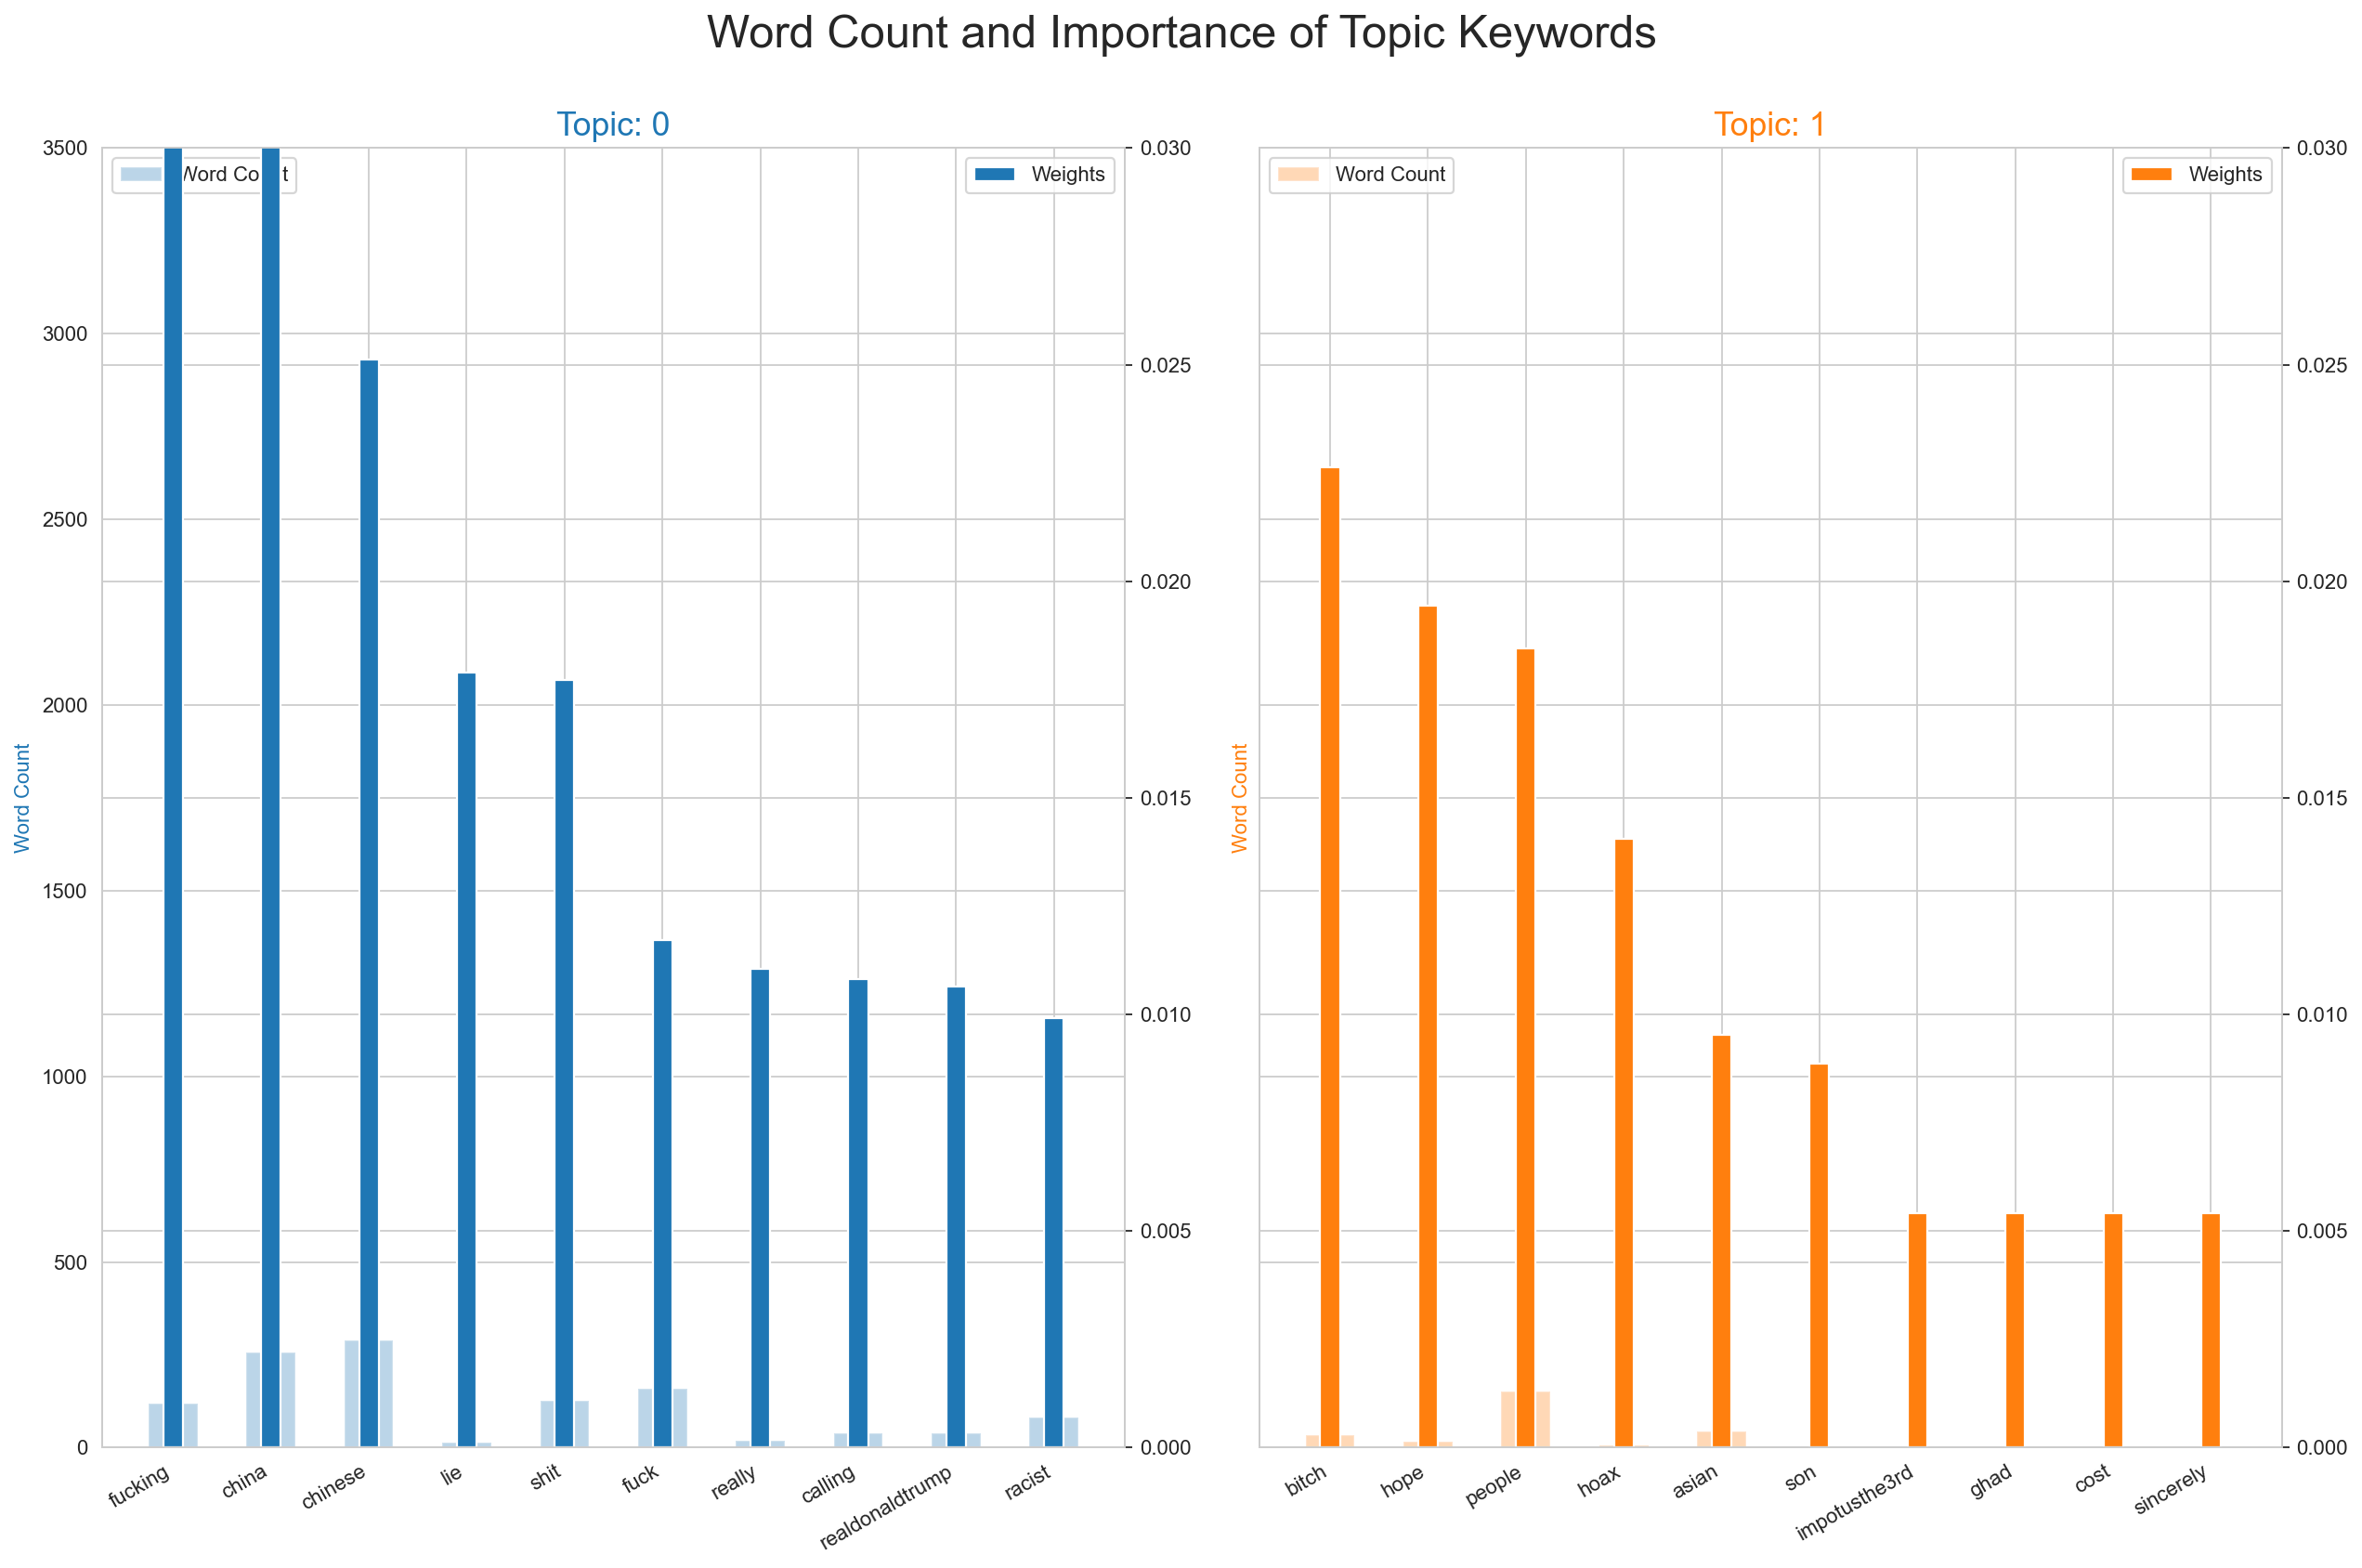

In [110]:
#Word count graphs for Hatred tweets number of topics 2
from collections import Counter
topics = lda_model_n.show_topics(formatted=False)
data_flat = [w for w_list in trying_n for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [106]:
# Visualizing the topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ritika/opt/anaconda3/lib/python

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.153653 -0.008900       1        1  21.482040
4     -0.076250 -0.024393       2        1  15.022054
1     -0.053802 -0.051299       3        1  14.605751
5      0.030514  0.192803       4        1  13.707990
2      0.027731 -0.006594       5        1  13.705143
6      0.126346 -0.059353       6        1  11.648742
3      0.099113 -0.042263       7        1   9.828280, topic_info=         Term        Freq       Total Category  logprob  loglift
2433  fucking  106.000000  106.000000  Default  30.0000  30.0000
2401    asian   58.000000   58.000000  Default  29.0000  29.0000
2        fuck  146.000000  146.000000  Default  28.0000  28.0000
302     world   88.000000   88.000000  Default  27.0000  27.0000
1179     shit  132.000000  132.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
671      even    6.713541   38.979138   Topic7  -5.5155   0.5610
729    racist    8.140934  113.149743   Topic7  -5.3227  -0.3119
1193   called    5.736401   23.077870   Topic7  -5.6728   0.9279
880     china    5.909344  268.962004   Topic7  -5.6431  -1.4981
316     wuhan    5.522230   76.654083   Topic7  -5.7108  -0.3106

[463 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1299      7  0.677680       300
2976      7  0.889950       400
755       2  0.804483  absolute
128       7  0.677656     added
1885      3  0.733871     admit
...     ...       ...       ...
2298      2  0.141143     youre
2298      4  0.564572     youre
2298      7  0.282286     youre
2441      5  0.934834   youtube
4408      1  0.827566    zlj517

[751 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 6, 3, 7, 4])

In [109]:
#Interactive chart when the number of topics for hatred tweets is 9
vis_p1 = pyLDAvis.gensim_models.prepare(lda_model_n1, doc_term_matrix_n, dictionary_n)
vis_p1

/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.287789 -0.143865       1        1  19.754410
7     -0.069891  0.262618       2        1  16.000645
5     -0.091091  0.057878       3        1  15.858152
2      0.114772 -0.084600       4        1  10.668119
6      0.070974 -0.004337       5        1  10.471400
1      0.057304  0.003083       6        1   7.911081
8      0.063428 -0.004983       7        1   7.676504
3      0.094025 -0.076010       8        1   7.633480
0      0.048267 -0.009784       9        1   4.026209, topic_info=               Term        Freq       Total Category  logprob  loglift
996         fucking  250.000000  250.000000  Default  30.0000  30.0000
361           china  284.000000  284.000000  Default  29.0000  29.0000
57           people  192.000000  192.000000  Default  28.0000  28.0000
468            shit  156.000000  156.000000  Default  27.0000  27.0000
279             lie  155.000000  155.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
3944           ghad    1.861353   19.681958   Topic9  -5.4732   0.8539
3945  impotusthe3rd    1.861353   19.681958   Topic9  -5.4732   0.8539
3946         magats    1.861353   19.681958   Topic9  -5.4732   0.8539
3947       reckless    1.861353   19.681958   Topic9  -5.4732   0.8539
3948      sincerely    1.861353   19.681958   Topic9  -5.4732   0.8539

[328 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
453       5  0.972813               100
327       1  0.928387                 3
3942      1  0.152424         abysmally
3942      2  0.050808         abysmally
3942      3  0.101616         abysmally
...     ...       ...               ...
631       1  0.977666             wuhan
1700      4  0.912487  wuhancoronavirus
1052      4  0.963946        wuhanvirus
1346      2  0.982704              yeah
1437      8  0.963153             youre

[339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 6, 3, 7, 2, 9, 4, 1])

In [107]:
#Interactive chart with number of topics for hatred tweets as 2
pyLDAvis.enable_notebook()

vis_n = pyLDAvis.gensim_models.prepare(lda_model_n, doc_term_matrix_n, dictionary_n)
vis_n

/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.119449  0.0       1        1  62.891814
1     -0.119449  0.0       2        1  37.108186, topic_info=           Term        Freq       Total Category  logprob  loglift
996     fucking  317.000000  317.000000  Default  30.0000  30.0000
361       china  230.000000  230.000000  Default  29.0000  29.0000
690       bitch   94.000000   94.000000  Default  28.0000  28.0000
779     chinese  174.000000  174.000000  Default  27.0000  27.0000
913        hope   83.000000   83.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3946     magats   22.150349   59.835638   Topic2  -5.2176  -0.0024
3947   reckless   22.150349   59.835638   Topic2  -5.2176  -0.0024
3948  sincerely   22.150349   59.835638   Topic2  -5.2176  -0.0024
402        hate   14.092249   25.634693   Topic2  -5.6699   0.3930
1384    believe   13.532409   68.107083   Topic2  -5.7104  -0.6247

[124 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3942      1  0.635073   abysmally
3942      2  0.367674   abysmally
437       1  0.992636     america
1150      2  0.998540      animal
1042      2  0.955325      anyone
...     ...       ...         ...
1052      2  0.031436  wuhanvirus
1346      1  0.964153        yeah
1346      2  0.045912        yeah
1437      1  0.112940       youre
1437      2  0.903519       youre

[148 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [108]:
pyLDAvis.enable_notebook()

vis_p = pyLDAvis.gensim_models.prepare(lda_model_p, doc_term_matrix_p, dictionary_p)
vis_p

/Users/ritika/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.195980  0.064202       1        1  24.487774
1      0.099114  0.097280       2        1  22.398416
3      0.082992 -0.127912       3        1  19.829270
2      0.070707  0.091331       4        1  17.599919
4     -0.056833 -0.124900       5        1  15.684621, topic_info=           Term       Freq      Total Category  logprob  loglift
625     chinese  78.000000  78.000000  Default  30.0000  30.0000
1223      china  65.000000  65.000000  Default  29.0000  29.0000
1794   democrat  42.000000  42.000000  Default  28.0000  28.0000
1769     racist  36.000000  36.000000  Default  27.0000  27.0000
862        shit  39.000000  39.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
2960  introduce  11.656382  17.419176   Topic5  -4.3848   1.4508
2961     pissed  11.656382  17.419176   Topic5  -4.3848   1.4508
2962     taxing  11.656382  17.419176   Topic5  -4.3848   1.4508
952         aid   9.616058  18.089266   Topic5  -4.5772   1.2206
2796      ching   3.775659   5.026541   Topic5  -5.5121   1.5663

[214 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
170       3  0.982452        2020
1530      2  0.988858           6
563       5  0.979611      action
952       1  0.442251         aid
952       5  0.552814         aid
...     ...       ...         ...
196       3  0.982586       world
2184      4  0.891656       wuflu
210       1  0.949378       wuhan
1897      4  0.965512  wuhanvirus
384       5  0.787968         yes

[227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])